### __Feature Selection__

In [1]:
# import libraries
import numpy as np
import pandas as pd
import random
import io
import requests
from datetime import datetime, timezone, timedelta
import datetime as dt
import time
from collections import Counter
from PIL import Image
import PIL.Image

import six
from six import StringIO
import sys
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg

# import seaborn
import seaborn as sns

# import plotly graph objects
import plotly.graph_objs as go
import plotly.express as px

# import scipy.cluster.hierarchy
import scipy
import scipy.linalg as la
import scipy.cluster.hierarchy as sch
from scipy.cluster.vq import whiten, kmeans, vq
from scipy.stats import multivariate_normal
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

# import category encoders
#import category_encoders as ce

import statsmodels.api as sm

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import sklearn.model_selection as model_selection
import sklearn.model_selection as cross_validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import average_precision_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_precision_recall_curve, plot_confusion_matrix
from sklearn.feature_selection import RFE
from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier

#for showing 2D plot
%matplotlib inline 

# to be able to see multiple ouputs from sungle cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Remove columns from the preliminary feature selection

<Figure size 960x800 with 0 Axes>

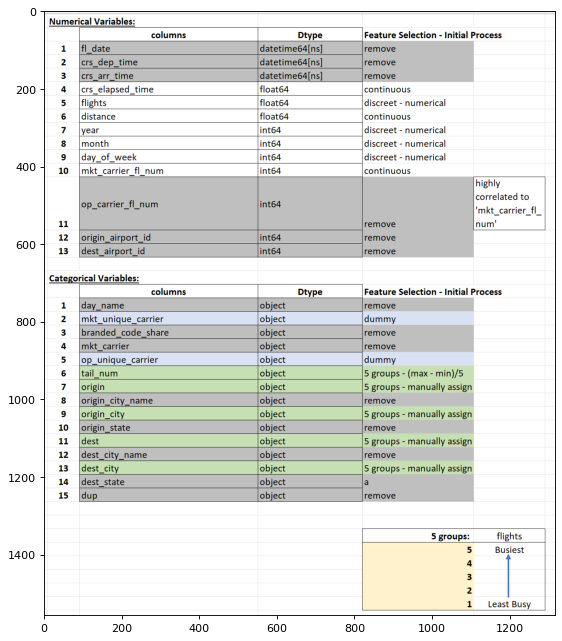

In [ ]:
figure(figsize=(12, 10), dpi=80)
plt.imshow(mpimg.imread('Initial_Feature_selection.png'))

In [20]:
# import training dataset
train_data = pd.read_csv('reduced_train_df.csv')
train_data.info()
train_data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fl_date             520681 non-null  object 
 1   year                520681 non-null  int64  
 2   month               520681 non-null  int64  
 3   day_of_week         520681 non-null  int64  
 4   day_name            520681 non-null  object 
 5   mkt_unique_carrier  520681 non-null  object 
 6   branded_code_share  520681 non-null  object 
 7   mkt_carrier         520681 non-null  object 
 8   mkt_carrier_fl_num  520681 non-null  int64  
 9   op_unique_carrier   520681 non-null  object 
 10  tail_num            520681 non-null  object 
 11  op_carrier_fl_num   520681 non-null  int64  
 12  origin_airport_id   520681 non-null  int64  
 13  origin              520681 non-null  object 
 14  origin_city_name    520681 non-null  object 
 15  origin_city         520681 non-nul

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,AA,AA,AA,4593,YX,...,Washington,DC,1900-01-01 06:55:00,1900-01-01 10:44:00,N,169.0,1.0,1158.0,99.0,1
1,2019-05-01,2019,5,2,Wednesday,AA,AA,AA,4648,YX,...,Charlotte,NC,1900-01-01 14:41:00,1900-01-01 17:05:00,N,144.0,1.0,736.0,4.0,1
2,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,32,DL,...,Atlanta,GA,1900-01-01 17:30:00,1900-01-01 20:44:00,N,134.0,1.0,731.0,15.0,1


In [21]:
# start time to measure the time of the program execution
start_time = time.time()

# 'fl_date' should be converted to datetime ('2019-05-01')
train_data['fl_date'] = pd.to_datetime(train_data['fl_date'], format='%Y-%m-%d')

# convert datetime.time object to pd.datetime ('1900-01-01 11:08:00')
train_data['crs_dep_time'] = pd.to_datetime(train_data['crs_dep_time'],format= '%Y-%m-%d %H:%M:%S')
train_data['crs_arr_time'] = pd.to_datetime(train_data['crs_arr_time'],format= '%Y-%m-%d %H:%M:%S')

# check
train_data.info()
train_data.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   fl_date             520681 non-null  datetime64[ns]
 1   year                520681 non-null  int64         
 2   month               520681 non-null  int64         
 3   day_of_week         520681 non-null  int64         
 4   day_name            520681 non-null  object        
 5   mkt_unique_carrier  520681 non-null  object        
 6   branded_code_share  520681 non-null  object        
 7   mkt_carrier         520681 non-null  object        
 8   mkt_carrier_fl_num  520681 non-null  int64         
 9   op_unique_carrier   520681 non-null  object        
 10  tail_num            520681 non-null  object        
 11  op_carrier_fl_num   520681 non-null  int64         
 12  origin_airport_id   520681 non-null  int64         
 13  origin              520681 no

,fl_date,year,month,day_of_week,day_name,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,...,dest_city,dest_state,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance,arr_delay,target_class
0,2019-05-01,2019,5,2,Wednesday,AA,AA,AA,4593,YX,...,Washington,DC,1900-01-01 06:55:00,1900-01-01 10:44:00,N,169.0,1.0,1158.0,99.0,1
1,2019-05-01,2019,5,2,Wednesday,AA,AA,AA,4648,YX,...,Charlotte,NC,1900-01-01 14:41:00,1900-01-01 17:05:00,N,144.0,1.0,736.0,4.0,1
2,2019-05-01,2019,5,2,Wednesday,DL,DL,DL,32,DL,...,Atlanta,GA,1900-01-01 17:30:00,1900-01-01 20:44:00,N,134.0,1.0,731.0,15.0,1




--- 0.8979997634887695 seconds ---


In [52]:
# make a copy of the train data
work_df = train_data.copy()

In [53]:
# start time to measure the time of the program execution
start_time = time.time()

# remove columns that will not be used for machine learning model
remove_columns = ['fl_date', 'crs_dep_time', 'crs_arr_time', 'day_name', 'origin_airport_id', 
                  'branded_code_share', 'dest_airport_id', 'mkt_carrier', 'origin_city_name', 
                  'origin_state', 'dest_city_name', 'dest_state', 'dup','arr_delay']
work_df = work_df.drop(remove_columns, axis=1)

work_df.info()
work_df.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                520681 non-null  int64  
 1   month               520681 non-null  int64  
 2   day_of_week         520681 non-null  int64  
 3   mkt_unique_carrier  520681 non-null  object 
 4   mkt_carrier_fl_num  520681 non-null  int64  
 5   op_unique_carrier   520681 non-null  object 
 6   tail_num            520681 non-null  object 
 7   op_carrier_fl_num   520681 non-null  int64  
 8   origin              520681 non-null  object 
 9   origin_city         520681 non-null  object 
 10  dest                520681 non-null  object 
 11  dest_city           520681 non-null  object 
 12  crs_elapsed_time    520681 non-null  float64
 13  flights             520681 non-null  float64
 14  distance            520681 non-null  float64
 15  target_class        520681 non-nul

,year,month,day_of_week,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin,origin_city,dest,dest_city,crs_elapsed_time,flights,distance,target_class
0,2019,5,2,AA,4593,YX,N436YX,4593,OKC,Oklahoma City,DCA,Washington,169.0,1.0,1158.0,1
1,2019,5,2,AA,4648,YX,N110HQ,4648,EYW,Key West,CLT,Charlotte,144.0,1.0,736.0,1
2,2019,5,2,DL,32,DL,N319US,32,DFW,Dallas/Fort Worth,ATL,Atlanta,134.0,1.0,731.0,1




--- 0.2921750545501709 seconds ---


In [17]:
# start time to measure the time of the program execution
start_time = time.time()

# For 'crs_dep_time' and 'crs_arr_time', convert the time values to integer values.

test = pd.read_csv('reduced_train_df.csv')
df = test[['fl_date', 'crs_dep_time', 'crs_arr_time']]

# 'fl_date' should be converted to datetime ('2019-05-01')
df['fl_date'] = pd.to_datetime(df['fl_date'], format='%Y-%m-%d')

# convert datetime.time object to pd.datetime ('1900-01-01 11:08:00')
df['crs_dep_time'] = pd.to_datetime(df['crs_dep_time'],format= '%Y-%m-%d %H:%M:%S')
df['crs_arr_time'] = pd.to_datetime(df['crs_arr_time'],format= '%Y-%m-%d %H:%M:%S')

# function that takes variable with time values and returns list of integer values
def convert_int(var_array):
    
    int_values = []
    
    # for each integer value in variable, 
    #   convert the value to string value in specific form
    #   that is acceptable for datetime strptime
    for value in var_array:
        hour = str(value.hour)
        minute = str(value.minute)
        
        if minute == '0':
            minute = '00'
            
        time_string = hour + minute
        int_values.append(int(time_string))
    
    return int_values

# run the function above to two variables
time_values_dep2 = convert_int(df['crs_dep_time'])
time_values_arr2 = convert_int(df['crs_arr_time'])

# convert variable values to converted values from above
df['crs_dep_time'] = time_values_dep2
df['crs_arr_time'] = time_values_arr2

# convert datetime to string values - 'fl_date'
#work_df['fl_date'] = work_df['fl_date'].astype('str')

# check
df.info()
df.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   fl_date       520681 non-null  datetime64[ns]
 1   crs_dep_time  520681 non-null  int64         
 2   crs_arr_time  520681 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 11.9 MB


,fl_date,crs_dep_time,crs_arr_time
0,2019-05-01,655,1044
1,2019-05-01,1441,175
2,2019-05-01,1730,2044




--- 33.57129645347595 seconds ---


In [18]:
df.to_csv('crs_fl_data.csv', index=False)

In [54]:
work_df_no_dummy = work_df.copy()
work_df_no_dummy.info()
work_df_no_dummy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                520681 non-null  int64  
 1   month               520681 non-null  int64  
 2   day_of_week         520681 non-null  int64  
 3   mkt_unique_carrier  520681 non-null  object 
 4   mkt_carrier_fl_num  520681 non-null  int64  
 5   op_unique_carrier   520681 non-null  object 
 6   tail_num            520681 non-null  object 
 7   op_carrier_fl_num   520681 non-null  int64  
 8   origin              520681 non-null  object 
 9   origin_city         520681 non-null  object 
 10  dest                520681 non-null  object 
 11  dest_city           520681 non-null  object 
 12  crs_elapsed_time    520681 non-null  float64
 13  flights             520681 non-null  float64
 14  distance            520681 non-null  float64
 15  target_class        520681 non-nul

,year,month,day_of_week,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin,origin_city,dest,dest_city,crs_elapsed_time,flights,distance,target_class
0,2019,5,2,AA,4593,YX,N436YX,4593,OKC,Oklahoma City,DCA,Washington,169.0,1.0,1158.0,1
1,2019,5,2,AA,4648,YX,N110HQ,4648,EYW,Key West,CLT,Charlotte,144.0,1.0,736.0,1
2,2019,5,2,DL,32,DL,N319US,32,DFW,Dallas/Fort Worth,ATL,Atlanta,134.0,1.0,731.0,1
3,2019,5,2,DL,327,DL,N920DU,327,DTW,Detroit,SJC,San Jose,296.0,1.0,2062.0,1
4,2019,5,2,DL,517,DL,N937AT,517,GSO,Greensboro/High Point,ATL,Atlanta,85.0,1.0,306.0,1


#### Create Dummy Variables for the following:
> - mkt_unique_carrier
> - op_unique_carrier

In [55]:
# start time to measure the time of the program execution
start_time = time.time()

# create dummy variables
dummy_features = ['mkt_unique_carrier', 'op_unique_carrier']
df_dummy = pd.get_dummies(work_df[dummy_features])
df_dummy

# remove variables related to dummy_features from work_df
work_df = work_df.drop(dummy_features, axis=1)

# combine dummy variables with work_df
work_df = pd.concat([work_df, df_dummy], axis=1)

# check
work_df.info()
work_df.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,mkt_unique_carrier_AA,mkt_unique_carrier_AS,mkt_unique_carrier_B6,mkt_unique_carrier_DL,mkt_unique_carrier_F9,mkt_unique_carrier_G4,mkt_unique_carrier_HA,mkt_unique_carrier_NK,mkt_unique_carrier_UA,mkt_unique_carrier_VX,...,op_unique_carrier_OH,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520676,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
520677,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
520678,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
520679,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 53 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   520681 non-null  int64  
 1   month                  520681 non-null  int64  
 2   day_of_week            520681 non-null  int64  
 3   mkt_carrier_fl_num     520681 non-null  int64  
 4   tail_num               520681 non-null  object 
 5   op_carrier_fl_num      520681 non-null  int64  
 6   origin                 520681 non-null  object 
 7   origin_city            520681 non-null  object 
 8   dest                   520681 non-null  object 
 9   dest_city              520681 non-null  object 
 10  crs_elapsed_time       520681 non-null  float64
 11  flights                520681 non-null  float64
 12  distance               520681 non-null  float64
 13  target_class           520681 non-null  int64  
 14  mkt_unique_carrier_AA  520681 non-nu

,year,month,day_of_week,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin,origin_city,dest,dest_city,...,op_unique_carrier_OH,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW
0,2019,5,2,4593,N436YX,4593,OKC,Oklahoma City,DCA,Washington,...,0,0,0,0,0,0,0,0,1,0
1,2019,5,2,4648,N110HQ,4648,EYW,Key West,CLT,Charlotte,...,0,0,0,0,0,0,0,0,1,0
2,2019,5,2,32,N319US,32,DFW,Dallas/Fort Worth,ATL,Atlanta,...,0,0,0,0,0,0,0,0,0,0




--- 0.6547820568084717 seconds ---


In [56]:
# start time to measure the time of the program execution
start_time = time.time()

# Move 'target_class' variable to the last column
target = work_df['target_class']
target

# remove variables related to dummy_features from work_df
work_df = work_df.drop(['target_class'], axis=1)

# add back the target variable to the last column'
work_df['target_class'] = target

# check
work_df.info()
work_df.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

0         1
1         1
2         1
3         1
4         1
         ..
520676    0
520677    0
520678    0
520679    0
520680    0
Name: target_class, Length: 520681, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 53 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   520681 non-null  int64  
 1   month                  520681 non-null  int64  
 2   day_of_week            520681 non-null  int64  
 3   mkt_carrier_fl_num     520681 non-null  int64  
 4   tail_num               520681 non-null  object 
 5   op_carrier_fl_num      520681 non-null  int64  
 6   origin                 520681 non-null  object 
 7   origin_city            520681 non-null  object 
 8   dest                   520681 non-null  object 
 9   dest_city              520681 non-null  object 
 10  crs_elapsed_time       520681 non-null  float64
 11  flights                520681 non-null  float64
 12  distance               520681 non-null  float64
 13  mkt_unique_carrier_AA  520681 non-null  uint8  
 14  mkt_unique_carrier_AS  520681 non-nu

,year,month,day_of_week,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin,origin_city,dest,dest_city,...,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW,target_class
0,2019,5,2,4593,N436YX,4593,OKC,Oklahoma City,DCA,Washington,...,0,0,0,0,0,0,0,1,0,1
1,2019,5,2,4648,N110HQ,4648,EYW,Key West,CLT,Charlotte,...,0,0,0,0,0,0,0,1,0,1
2,2019,5,2,32,N319US,32,DFW,Dallas/Fort Worth,ATL,Atlanta,...,0,0,0,0,0,0,0,0,0,1




--- 0.40834903717041016 seconds ---


In [ ]:
# export work_df to csv to keep data before creting ordinal variables
work_df.to_csv('work_df.csv', index=False)

In [57]:
# make a copy of work_df to another dataframe
work_df2 = work_df.copy()

### Create Ordinal Variables based on Flights
> - tail_num
> - origin
> - origin_city
> - dest
> - dest_city

#### __tail_nim__

In [58]:
# start time to measure the time of the program execution
start_time = time.time()

# create summary table of tail_num vs flights
tail_num_table = pd.pivot_table(work_df2, values='flights', index=['tail_num'],
                                aggfunc=np.sum)

# reindex the rows to restore the variable in index to column
tail_num_table = tail_num_table.reset_index(drop=False)
tail_num_table

# get min & Max values from the table
min_tailnum = min(tail_num_table['flights'])
max_tailnum = max(tail_num_table['flights'])
bin_size = int((max_tailnum - min_tailnum) / 5 + 1)

print(f"Max Value: {max_tailnum} | Min Value: {min_tailnum} | Bin Size: {bin_size}")

# allocate bin_size to 5 groups
group1 = int(min_tailnum + bin_size)
group2 = int(group1 + bin_size)
group3 = int(group2 + bin_size)
group4 = int(group3 + bin_size)
group5 = int(group4 + bin_size)

print(f"group 1: {group1} | group 2: {group2} | group 3: {group3} | \
group 4: {group4} | group 5: {group5}")

# assign the group number to tail_num values
tail_num_class = []

for value in tail_num_table['flights']:
    if value <= group1:
        tail_num_class.append(1)
    elif value > group1 and value <= group2:
        tail_num_class.append(2)
    elif value > group2 and value <= group3:
        tail_num_class.append(3)
    elif value > group3 and value <= group4:
        tail_num_class.append(4)
    elif value > group4 and value <= group5:
        tail_num_class.append(5)

# assign the list above to a new class variable
tail_num_table['class'] = tail_num_class

# check 
tail_num_table
tail_num_table['class'].unique()

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,tail_num,flights
0,215NV,79.0
1,216NV,92.0
2,217NV,73.0
3,218NV,77.0
4,219NV,85.0
...,...,...
6407,N998JE,32.0
6408,N998NN,92.0
6409,N999DN,123.0
6410,N999JB,6.0


Max Value: 234.0 | Min Value: 1.0 | Bin Size: 47
group 1: 48 | group 2: 95 | group 3: 142 | group 4: 189 | group 5: 236


,tail_num,flights,class
0,215NV,79.0,2
1,216NV,92.0,2
2,217NV,73.0,2
3,218NV,77.0,2
4,219NV,85.0,2
...,...,...,...
6407,N998JE,32.0,1
6408,N998NN,92.0,2
6409,N999DN,123.0,3
6410,N999JB,6.0,1


array([2, 3, 1, 4, 5])



--- 0.14231586456298828 seconds ---


(array([1237.,    0., 2704.,    0.,    0., 2253.,    0.,  200.,    0.,
          18.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

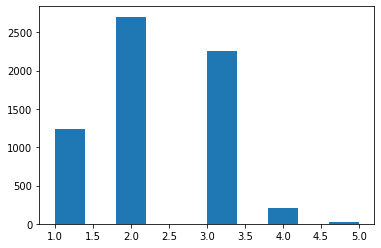

In [59]:
data_0 = tail_num_table['class'].values

# histogram plot
pyplot.hist(data_0)
pyplot.show()

In [60]:
# start time to measure the time of the program execution
start_time = time.time()

# create a dictiornary - key with tail_num and value with class
# restructure the tableto prepare for a dictionary
tail_num_df = tail_num_table.drop(['flights'], axis=1)
tail_num_df

# create an empty dictionary
dict0 = {}

for num in range(len(tail_num_df)):
    dict0[tail_num_df.iloc[num, 0]] = tail_num_df.iloc[num, 1]

# check dictionary created from above
dict0

# map the ordinal features, using the dictionary above
work_df2 = work_df2.replace({"tail_num" : dict0})

# check
work_df2.info()
work_df2.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,tail_num,class
0,215NV,2
1,216NV,2
2,217NV,2
3,218NV,2
4,219NV,2
...,...,...
6407,N998JE,1
6408,N998NN,2
6409,N999DN,3
6410,N999JB,1


{'215NV': 2,
 '216NV': 2,
 '217NV': 2,
 '218NV': 2,
 '219NV': 2,
 '220NV': 2,
 '221NV': 2,
 '222NV': 2,
 '223NV': 2,
 '224NV': 2,
 '225NV': 2,
 '226NV': 2,
 '227NV': 2,
 '228NV': 2,
 '229NV': 2,
 '230NV': 2,
 '231NV': 2,
 '232NV': 3,
 '233NV': 2,
 '234NV': 2,
 '235NV': 1,
 '240NV': 2,
 '241NV': 2,
 '242NV': 1,
 '243NV': 1,
 '244NV': 1,
 '245NV': 1,
 '246NV': 2,
 '247NV': 2,
 '248NV': 3,
 '249NV': 2,
 '250NV': 2,
 '251NV': 3,
 '252NV': 3,
 '253NV': 3,
 '254NV': 3,
 '255NV': 3,
 '256NV': 2,
 '257NV': 2,
 '258NV': 2,
 '259NV': 1,
 '260NV': 2,
 '261NV': 2,
 '262NV': 2,
 '271NV': 2,
 '272NV': 2,
 '273NV': 2,
 '274NV': 2,
 '275NV': 1,
 '276NV': 2,
 '279NV': 1,
 '280NV': 1,
 '282NV': 1,
 '283NV': 1,
 '301NV': 2,
 '302NV': 2,
 '303NV': 2,
 '304NV': 2,
 '305NV': 2,
 '306NV': 2,
 '307NV': 2,
 '308NV': 2,
 '309NV': 2,
 '310NV': 2,
 '311NV': 2,
 '312NV': 2,
 '313NV': 2,
 '314NV': 2,
 '315NV': 2,
 '316NV': 2,
 '317NV': 2,
 '318NV': 2,
 '319NV': 2,
 '320NV': 1,
 '321NV': 1,
 '322NV': 1,
 '323NV': 1,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 53 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   520681 non-null  int64  
 1   month                  520681 non-null  int64  
 2   day_of_week            520681 non-null  int64  
 3   mkt_carrier_fl_num     520681 non-null  int64  
 4   tail_num               520681 non-null  int64  
 5   op_carrier_fl_num      520681 non-null  int64  
 6   origin                 520681 non-null  object 
 7   origin_city            520681 non-null  object 
 8   dest                   520681 non-null  object 
 9   dest_city              520681 non-null  object 
 10  crs_elapsed_time       520681 non-null  float64
 11  flights                520681 non-null  float64
 12  distance               520681 non-null  float64
 13  mkt_unique_carrier_AA  520681 non-null  uint8  
 14  mkt_unique_carrier_AS  520681 non-nu

,year,month,day_of_week,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin,origin_city,dest,dest_city,...,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW,target_class
0,2019,5,2,4593,3,4593,OKC,Oklahoma City,DCA,Washington,...,0,0,0,0,0,0,0,1,0,1
1,2019,5,2,4648,3,4648,EYW,Key West,CLT,Charlotte,...,0,0,0,0,0,0,0,1,0,1
2,2019,5,2,32,2,32,DFW,Dallas/Fort Worth,ATL,Atlanta,...,0,0,0,0,0,0,0,0,0,1




--- 148.15844535827637 seconds ---


In [61]:
work_df2['tail_num'].unique()

array([3, 2, 1, 4, 5])

#### __origin__

In [63]:
# start time to measure the time of the program execution
start_time = time.time()

# create summary table of tail_num vs flights
origin_table = pd.pivot_table(work_df2, values='flights', index=['origin'],
                                aggfunc=np.sum)

# reindex the rows to restore the variable in index to column
origin_table = origin_table.reset_index(drop=False)
origin_table

# get min & Max values from the table
min_tailnum1 = min(origin_table['flights'])
max_tailnum1 = max(origin_table['flights'])
#bin_size1 = int((max_tailnum1 - min_tailnum1) / 5 + 1)

print(f"Max Value: {max_tailnum1} | Min Value: {min_tailnum1}")

# allocate bin_size to 5 groups
group11 = 1000
group21 = 2000
group31 = 5000
group41 = 11000
group51 = 27000
#group11 = int(min_tailnum1 + bin_size1)
#group21 = int(group11 + bin_size1)
#group31 = int(group21 + bin_size1)
#group41 = int(group31 + bin_size1)
#group51 = int(group41 + bin_size1)

print(f"group 1: {group11} | group 2: {group21} | group 3: {group31} | \
group 4: {group41} | group 5: {group51}")

# assign the group number to tail_num values
origin_class = []

for value in origin_table['flights']:
    if value <= group11:
        origin_class.append(1)
    elif value > group11 and value <= group21:
        origin_class.append(2)
    elif value > group21 and value <= group31:
        origin_class.append(3)
    elif value > group31 and value <= group41:
        origin_class.append(4)
    elif value > group41 and value <= group51:
        origin_class.append(5)

# assign the list above to a new class variable
origin_table['class'] = origin_class

# check 
origin_table
origin_table['class'].unique()

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,origin,flights
0,ABE,433.0
1,ABI,145.0
2,ABQ,1780.0
3,ABR,48.0
4,ABY,66.0
...,...,...
370,XNA,978.0
371,XWA,13.0
372,YAK,46.0
373,YKM,85.0


Max Value: 26554.0 | Min Value: 1.0
group 1: 1000 | group 2: 2000 | group 3: 5000 | group 4: 11000 | group 5: 27000


,origin,flights,class
0,ABE,433.0,1
1,ABI,145.0,1
2,ABQ,1780.0,2
3,ABR,48.0,1
4,ABY,66.0,1
...,...,...,...
370,XNA,978.0,1
371,XWA,13.0,1
372,YAK,46.0,1
373,YKM,85.0,1


array([1, 2, 5, 3, 4])



--- 0.09337282180786133 seconds ---


(array([287.,   0.,  37.,   0.,   0.,  21.,   0.,  18.,   0.,  12.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

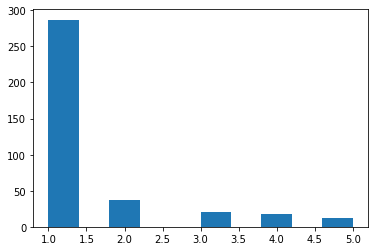

In [64]:
data_1 = origin_table['class'].values

# histogram plot
pyplot.hist(data_1)
pyplot.show()

In [65]:
# start time to measure the time of the program execution
start_time = time.time()

# create a dictiornary - key with tail_num and value with class
# restructure the tableto prepare for a dictionary
origin_df = origin_table.drop(['flights'], axis=1)
origin_df

# create an empty dictionary
dict1 = {}

for num in range(len(origin_df)):
    dict1[origin_df.iloc[num, 0]] = origin_df.iloc[num, 1]

# check dictionary created from above
dict1

# map the ordinal features, using the dictionary above
work_df2 = work_df2.replace({"origin" : dict1})

# check
work_df2.info()
work_df2.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,origin,class
0,ABE,1
1,ABI,1
2,ABQ,2
3,ABR,1
4,ABY,1
...,...,...
370,XNA,1
371,XWA,1
372,YAK,1
373,YKM,1


{'ABE': 1,
 'ABI': 1,
 'ABQ': 2,
 'ABR': 1,
 'ABY': 1,
 'ACK': 1,
 'ACT': 1,
 'ACV': 1,
 'ACY': 1,
 'ADK': 1,
 'ADQ': 1,
 'AEX': 1,
 'AGS': 1,
 'AKN': 1,
 'ALB': 2,
 'ALO': 1,
 'ALW': 1,
 'AMA': 1,
 'ANC': 2,
 'APN': 1,
 'ART': 1,
 'ASE': 1,
 'ATL': 5,
 'ATW': 1,
 'ATY': 1,
 'AUS': 3,
 'AVL': 1,
 'AVP': 1,
 'AZA': 1,
 'AZO': 1,
 'BDL': 2,
 'BET': 1,
 'BFF': 1,
 'BFL': 1,
 'BFM': 1,
 'BGM': 1,
 'BGR': 1,
 'BHM': 2,
 'BIL': 1,
 'BIS': 1,
 'BJI': 1,
 'BKG': 1,
 'BLI': 1,
 'BLV': 1,
 'BMI': 1,
 'BNA': 4,
 'BOI': 2,
 'BOS': 4,
 'BPT': 1,
 'BQK': 1,
 'BQN': 1,
 'BRD': 1,
 'BRO': 1,
 'BRW': 1,
 'BTM': 1,
 'BTR': 1,
 'BTV': 1,
 'BUF': 2,
 'BUR': 2,
 'BWI': 4,
 'BZN': 1,
 'CAE': 1,
 'CAK': 1,
 'CDC': 1,
 'CDV': 1,
 'CGI': 1,
 'CHA': 1,
 'CHO': 1,
 'CHS': 2,
 'CID': 1,
 'CIU': 1,
 'CKB': 1,
 'CLE': 3,
 'CLL': 1,
 'CLT': 5,
 'CMH': 3,
 'CMI': 1,
 'CMX': 1,
 'CNY': 1,
 'COD': 1,
 'COS': 1,
 'COU': 1,
 'CPR': 1,
 'CRP': 1,
 'CRW': 1,
 'CSG': 1,
 'CVG': 3,
 'CWA': 1,
 'CYS': 1,
 'DAB': 1,
 'DAL': 3,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 53 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   520681 non-null  int64  
 1   month                  520681 non-null  int64  
 2   day_of_week            520681 non-null  int64  
 3   mkt_carrier_fl_num     520681 non-null  int64  
 4   tail_num               520681 non-null  int64  
 5   op_carrier_fl_num      520681 non-null  int64  
 6   origin                 520681 non-null  int64  
 7   origin_city            520681 non-null  object 
 8   dest                   520681 non-null  object 
 9   dest_city              520681 non-null  object 
 10  crs_elapsed_time       520681 non-null  float64
 11  flights                520681 non-null  float64
 12  distance               520681 non-null  float64
 13  mkt_unique_carrier_AA  520681 non-null  uint8  
 14  mkt_unique_carrier_AS  520681 non-nu

,year,month,day_of_week,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin,origin_city,dest,dest_city,...,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW,target_class
0,2019,5,2,4593,3,4593,2,Oklahoma City,DCA,Washington,...,0,0,0,0,0,0,0,1,0,1
1,2019,5,2,4648,3,4648,1,Key West,CLT,Charlotte,...,0,0,0,0,0,0,0,1,0,1
2,2019,5,2,32,2,32,5,Dallas/Fort Worth,ATL,Atlanta,...,0,0,0,0,0,0,0,0,0,1




--- 6.581984519958496 seconds ---


In [66]:
work_df2['origin'].unique()

array([2, 1, 5, 4, 3])

#### __origin_city__

In [67]:
# start time to measure the time of the program execution
start_time = time.time()

# create summary table of tail_num vs flights
origincity_table = pd.pivot_table(work_df2, values='flights', index=['origin_city'],
                                aggfunc=np.sum)
# reindex the rows to restore the variable in index to column
origincity_table = origincity_table.reset_index(drop=False)
origincity_table

# get min & Max values from the table
min_tailnum2 = min(origincity_table['flights'])
max_tailnum2 = max(origincity_table['flights'])
#bin_size2 = int((max_tailnum2 - min_tailnum2) / 5 + 1)

print(f"Max Value: {max_tailnum2} | Min Value: {min_tailnum2}")

# allocate bin_size to 5 groups
group12 = 1000
group22 = 2500
group32 = 7000
group42 = 12000
group52 = 33000

print(f"group 1: {group12} | group 2: {group22} | group 3: {group32} | \
group 4: {group42} | group 5: {group52}")

# assign the group number to tail_num values
origincity_class = []

for value in origincity_table['flights']:
    if value <= group12:
        origincity_class.append(1)
    elif value > group12 and value <= group22:
        origincity_class.append(2)
    elif value > group22 and value <= group32:
        origincity_class.append(3)
    elif value > group32 and value <= group42:
        origincity_class.append(4)
    elif value > group42 and value <= group52:
        origincity_class.append(5)

# assign the list above to a new class variable
origincity_table['class'] = origincity_class

# check 
origincity_table
origincity_table['class'].unique()

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,origin_city,flights
0,Aberdeen,48.0
1,Abilene,145.0
2,Adak Island,5.0
3,Aguadilla,138.0
4,Akron,490.0
...,...,...
353,Worcester,115.0
354,Wrangell,31.0
355,Yakima,85.0
356,Yakutat,46.0


Max Value: 32277.0 | Min Value: 1.0
group 1: 1000 | group 2: 2500 | group 3: 7000 | group 4: 12000 | group 5: 33000


,origin_city,flights,class
0,Aberdeen,48.0,1
1,Abilene,145.0,1
2,Adak Island,5.0,1
3,Aguadilla,138.0,1
4,Akron,490.0,1
...,...,...,...
353,Worcester,115.0,1
354,Wrangell,31.0,1
355,Yakima,85.0,1
356,Yakutat,46.0,1


array([1, 2, 5, 3, 4])



--- 0.11514091491699219 seconds ---


(array([273.,   0.,  41.,   0.,   0.,  24.,   0.,   9.,   0.,  11.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

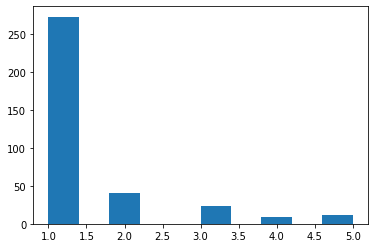

In [68]:
data_2 = origincity_table['class'].values

# histogram plot
pyplot.hist(data_2)
pyplot.show()

In [69]:
# start time to measure the time of the program execution
start_time = time.time()

# create a dictiornary - key with tail_num and value with class
# restructure the tableto prepare for a dictionary
origincity_df = origincity_table.drop(['flights'], axis=1)
origincity_df

# create an empty dictionary
dict2 = {}

for num in range(len(origincity_df)):
    dict2[origincity_df.iloc[num, 0]] = origincity_df.iloc[num, 1]

# check dictionary created from above
dict2

# map the ordinal features, using the dictionary above
work_df2 = work_df2.replace({"origin_city" : dict2})

# check
work_df2.info()
work_df2.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,origin_city,class
0,Aberdeen,1
1,Abilene,1
2,Adak Island,1
3,Aguadilla,1
4,Akron,1
...,...,...
353,Worcester,1
354,Wrangell,1
355,Yakima,1
356,Yakutat,1


{'Aberdeen': 1,
 'Abilene': 1,
 'Adak Island': 1,
 'Aguadilla': 1,
 'Akron': 1,
 'Albany': 2,
 'Albuquerque': 2,
 'Alexandria': 1,
 'Allentown/Bethlehem/Easton': 1,
 'Alpena': 1,
 'Amarillo': 1,
 'Anchorage': 2,
 'Appleton': 1,
 'Arcata/Eureka': 1,
 'Asheville': 1,
 'Ashland': 1,
 'Aspen': 1,
 'Atlanta': 5,
 'Atlantic City': 1,
 'Augusta': 1,
 'Austin': 3,
 'Bakersfield': 1,
 'Baltimore': 3,
 'Bangor': 1,
 'Barrow': 1,
 'Baton Rouge': 1,
 'Beaumont/Port Arthur': 1,
 'Belleville': 1,
 'Bellingham': 1,
 'Bemidji': 1,
 'Bend/Redmond': 1,
 'Bethel': 1,
 'Billings': 1,
 'Binghamton': 1,
 'Birmingham': 2,
 'Bismarck/Mandan': 1,
 'Bloomington/Normal': 1,
 'Boise': 2,
 'Boston': 4,
 'Bozeman': 1,
 'Brainerd': 1,
 'Branson': 1,
 'Bristol/Johnson City/Kingsport': 1,
 'Brownsville': 1,
 'Brunswick': 1,
 'Buffalo': 2,
 'Bullhead City': 1,
 'Burbank': 2,
 'Burlington': 1,
 'Butte': 1,
 'Cape Girardeau': 1,
 'Casper': 1,
 'Cedar City': 1,
 'Cedar Rapids/Iowa City': 1,
 'Champaign/Urbana': 1,
 'Charl

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 53 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   520681 non-null  int64  
 1   month                  520681 non-null  int64  
 2   day_of_week            520681 non-null  int64  
 3   mkt_carrier_fl_num     520681 non-null  int64  
 4   tail_num               520681 non-null  int64  
 5   op_carrier_fl_num      520681 non-null  int64  
 6   origin                 520681 non-null  int64  
 7   origin_city            520681 non-null  int64  
 8   dest                   520681 non-null  object 
 9   dest_city              520681 non-null  object 
 10  crs_elapsed_time       520681 non-null  float64
 11  flights                520681 non-null  float64
 12  distance               520681 non-null  float64
 13  mkt_unique_carrier_AA  520681 non-null  uint8  
 14  mkt_unique_carrier_AS  520681 non-nu

,year,month,day_of_week,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin,origin_city,dest,dest_city,...,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW,target_class
0,2019,5,2,4593,3,4593,2,2,DCA,Washington,...,0,0,0,0,0,0,0,1,0,1
1,2019,5,2,4648,3,4648,1,1,CLT,Charlotte,...,0,0,0,0,0,0,0,1,0,1
2,2019,5,2,32,2,32,5,5,ATL,Atlanta,...,0,0,0,0,0,0,0,0,0,1




--- 5.808350324630737 seconds ---


In [70]:
work_df2['origin_city'].unique()

array([2, 1, 5, 4, 3])

#### __dest__

In [71]:
# start time to measure the time of the program execution
start_time = time.time()

# create summary table of tail_num vs flights
dest_table = pd.pivot_table(work_df2, values='flights', index=['dest'],
                                aggfunc=np.sum)

# reindex the rows to restore the variable in index to column
dest_table = dest_table.reset_index(drop=False)
dest_table

# get min & Max values from the table
min_tailnum3 = min(dest_table['flights'])
max_tailnum3 = max(dest_table['flights'])
#bin_size3 = int((max_tailnum3 - min_tailnum3) / 5 + 1)

print(f"Max Value: {max_tailnum3} | Min Value: {min_tailnum3}")

# allocate bin_size to 5 groups
group13 = 1000
group23 = 2000
group33 = 6000
group43 = 12000
group53 = 26000

print(f"group 1: {group13} | group 2: {group23} | group 3: {group33} | \
group 4: {group43} | group 5: {group53}")

# assign the group number to tail_num values
dest_class = []

for value in dest_table['flights']:
    if value <= group13:
        dest_class.append(1)
    elif value > group13 and value <= group23:
        dest_class.append(2)
    elif value > group23 and value <= group33:
        dest_class.append(3)
    elif value > group33 and value <= group43:
        dest_class.append(4)
    elif value > group43 and value <= group53:
        dest_class.append(5)

# assign the list above to a new class variable
dest_table['class'] = dest_class

# check 
dest_table
dest_table['class'].unique()

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,dest,flights
0,ABE,423.0
1,ABI,137.0
2,ABQ,1786.0
3,ABR,37.0
4,ABY,68.0
...,...,...
370,XNA,1015.0
371,XWA,18.0
372,YAK,53.0
373,YKM,95.0


Max Value: 25730.0 | Min Value: 3.0
group 1: 1000 | group 2: 2000 | group 3: 6000 | group 4: 12000 | group 5: 26000


,dest,flights,class
0,ABE,423.0,1
1,ABI,137.0,1
2,ABQ,1786.0,2
3,ABR,37.0,1
4,ABY,68.0,1
...,...,...,...
370,XNA,1015.0,2
371,XWA,18.0,1
372,YAK,53.0,1
373,YKM,95.0,1


array([1, 2, 5, 3, 4])



--- 0.1026008129119873 seconds ---


(array([286.,   0.,  38.,   0.,   0.,  27.,   0.,  16.,   0.,   8.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

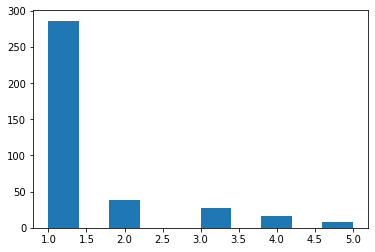

In [72]:
data_3 = dest_table['class'].values

# histogram plot
pyplot.hist(data_3)
pyplot.show()

In [73]:
# start time to measure the time of the program execution
start_time = time.time()

# create a dictiornary - key with tail_num and value with class
# restructure the tableto prepare for a dictionary
dest_df = dest_table.drop(['flights'], axis=1)
dest_df

# create an empty dictionary
dict3 = {}

for num in range(len(dest_df)):
    dict3[dest_df.iloc[num, 0]] = dest_df.iloc[num, 1]

# check dictionary created from above
dict3

# map the ordinal features, using the dictionary above
work_df2 = work_df2.replace({"dest" : dict3})

# check
work_df2.info()
work_df2.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,dest,class
0,ABE,1
1,ABI,1
2,ABQ,2
3,ABR,1
4,ABY,1
...,...,...
370,XNA,2
371,XWA,1
372,YAK,1
373,YKM,1


{'ABE': 1,
 'ABI': 1,
 'ABQ': 2,
 'ABR': 1,
 'ABY': 1,
 'ACK': 1,
 'ACT': 1,
 'ACV': 1,
 'ACY': 1,
 'ADK': 1,
 'ADQ': 1,
 'AEX': 1,
 'AGS': 1,
 'AKN': 1,
 'ALB': 2,
 'ALO': 1,
 'ALW': 1,
 'AMA': 1,
 'ANC': 2,
 'APN': 1,
 'ART': 1,
 'ASE': 1,
 'ATL': 5,
 'ATW': 1,
 'ATY': 1,
 'AUS': 3,
 'AVL': 1,
 'AVP': 1,
 'AZA': 1,
 'AZO': 1,
 'BDL': 2,
 'BET': 1,
 'BFF': 1,
 'BFL': 1,
 'BFM': 1,
 'BGM': 1,
 'BGR': 1,
 'BHM': 2,
 'BIL': 1,
 'BIS': 1,
 'BJI': 1,
 'BKG': 1,
 'BLI': 1,
 'BLV': 1,
 'BMI': 1,
 'BNA': 3,
 'BOI': 2,
 'BOS': 4,
 'BPT': 1,
 'BQK': 1,
 'BQN': 1,
 'BRD': 1,
 'BRO': 1,
 'BRW': 1,
 'BTM': 1,
 'BTR': 1,
 'BTV': 1,
 'BUF': 2,
 'BUR': 2,
 'BWI': 4,
 'BZN': 1,
 'CAE': 1,
 'CAK': 1,
 'CDC': 1,
 'CDV': 1,
 'CGI': 1,
 'CHA': 1,
 'CHO': 1,
 'CHS': 2,
 'CID': 1,
 'CIU': 1,
 'CKB': 1,
 'CLE': 3,
 'CLL': 1,
 'CLT': 5,
 'CMH': 3,
 'CMI': 1,
 'CMX': 1,
 'CNY': 1,
 'COD': 1,
 'COS': 1,
 'COU': 1,
 'CPR': 1,
 'CRP': 1,
 'CRW': 1,
 'CSG': 1,
 'CVG': 3,
 'CWA': 1,
 'CYS': 1,
 'DAB': 1,
 'DAL': 3,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 53 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   520681 non-null  int64  
 1   month                  520681 non-null  int64  
 2   day_of_week            520681 non-null  int64  
 3   mkt_carrier_fl_num     520681 non-null  int64  
 4   tail_num               520681 non-null  int64  
 5   op_carrier_fl_num      520681 non-null  int64  
 6   origin                 520681 non-null  int64  
 7   origin_city            520681 non-null  int64  
 8   dest                   520681 non-null  int64  
 9   dest_city              520681 non-null  object 
 10  crs_elapsed_time       520681 non-null  float64
 11  flights                520681 non-null  float64
 12  distance               520681 non-null  float64
 13  mkt_unique_carrier_AA  520681 non-null  uint8  
 14  mkt_unique_carrier_AS  520681 non-nu

,year,month,day_of_week,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin,origin_city,dest,dest_city,...,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW,target_class
0,2019,5,2,4593,3,4593,2,2,4,Washington,...,0,0,0,0,0,0,0,1,0,1
1,2019,5,2,4648,3,4648,1,1,5,Charlotte,...,0,0,0,0,0,0,0,1,0,1
2,2019,5,2,32,2,32,5,5,5,Atlanta,...,0,0,0,0,0,0,0,0,0,1




--- 6.534602880477905 seconds ---


In [74]:
work_df2['dest'].unique()

array([4, 5, 3, 2, 1])

#### __dest_city__

In [75]:
# start time to measure the time of the program execution
start_time = time.time()

# create summary table of tail_num vs flights
destcity_table = pd.pivot_table(work_df2, values='flights', index=['dest_city'],
                                aggfunc=np.sum)

# reindex the rows to restore the variable in index to column
destcity_table = destcity_table.reset_index(drop=False)
destcity_table

# get min & Max values from the table
min_tailnum4 = min(destcity_table['flights'])
max_tailnum4 = max(destcity_table['flights'])
#bin_size4 = int((max_tailnum4 - min_tailnum4) / 5 + 1)

print(f"Max Value: {max_tailnum4} | Min Value: {min_tailnum4}")

# allocate bin_size to 5 groups
group14 = 1000
group24 = 2500
group34 = 7000
group44 = 12000
group54 = 32000

print(f"group 1: {group14} | group 2: {group24} | group 3: {group34} | \
group 4: {group44} | group 5: {group54}")

# assign the group number to tail_num values
destcity_class = []

for value in destcity_table['flights']:
    if value <= group14:
        destcity_class.append(1)
    elif value > group14 and value <= group24:
        destcity_class.append(2)
    elif value > group24 and value <= group34:
        destcity_class.append(3)
    elif value > group34 and value <= group44:
        destcity_class.append(4)
    elif value > group44 and value <= group54:
        destcity_class.append(5)

# assign the list above to a new class variable
destcity_table['class'] = destcity_class

# check 
destcity_table
destcity_table['class'].unique()

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,dest_city,flights
0,Aberdeen,37.0
1,Abilene,137.0
2,Adak Island,6.0
3,Aguadilla,143.0
4,Akron,541.0
...,...,...
353,Worcester,97.0
354,Wrangell,58.0
355,Yakima,95.0
356,Yakutat,53.0


Max Value: 31275.0 | Min Value: 3.0
group 1: 1000 | group 2: 2500 | group 3: 7000 | group 4: 12000 | group 5: 32000


,dest_city,flights,class
0,Aberdeen,37.0,1
1,Abilene,137.0,1
2,Adak Island,6.0,1
3,Aguadilla,143.0,1
4,Akron,541.0,1
...,...,...,...
353,Worcester,97.0,1
354,Wrangell,58.0,1
355,Yakima,95.0,1
356,Yakutat,53.0,1


array([1, 2, 5, 3, 4])



--- 0.14072275161743164 seconds ---


(array([273.,   0.,  41.,   0.,   0.,  24.,   0.,   9.,   0.,  11.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

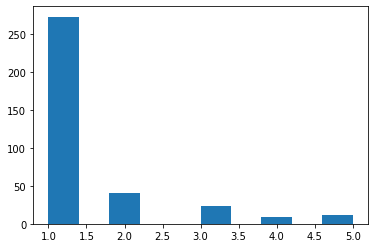

In [76]:
data_4 = destcity_table['class'].values

# histogram plot
pyplot.hist(data_4)
pyplot.show()

In [77]:
# start time to measure the time of the program execution
start_time = time.time()

# create a dictiornary - key with tail_num and value with class
# restructure the tableto prepare for a dictionary
destcity_df = destcity_table.drop(['flights'], axis=1)
destcity_df

# create an empty dictionary
dict4 = {}

for num in range(len(destcity_df)):
    dict4[destcity_df.iloc[num, 0]] = destcity_df.iloc[num, 1]

# check dictionary created from above
dict4

# map the ordinal features, using the dictionary above
work_df2 = work_df2.replace({"dest_city" : dict4})

# check
work_df2.info()
work_df2.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,dest_city,class
0,Aberdeen,1
1,Abilene,1
2,Adak Island,1
3,Aguadilla,1
4,Akron,1
...,...,...
353,Worcester,1
354,Wrangell,1
355,Yakima,1
356,Yakutat,1


{'Aberdeen': 1,
 'Abilene': 1,
 'Adak Island': 1,
 'Aguadilla': 1,
 'Akron': 1,
 'Albany': 2,
 'Albuquerque': 2,
 'Alexandria': 1,
 'Allentown/Bethlehem/Easton': 1,
 'Alpena': 1,
 'Amarillo': 1,
 'Anchorage': 2,
 'Appleton': 1,
 'Arcata/Eureka': 1,
 'Asheville': 1,
 'Ashland': 1,
 'Aspen': 1,
 'Atlanta': 5,
 'Atlantic City': 1,
 'Augusta': 1,
 'Austin': 3,
 'Bakersfield': 1,
 'Baltimore': 3,
 'Bangor': 1,
 'Barrow': 1,
 'Baton Rouge': 1,
 'Beaumont/Port Arthur': 1,
 'Belleville': 1,
 'Bellingham': 1,
 'Bemidji': 1,
 'Bend/Redmond': 1,
 'Bethel': 1,
 'Billings': 1,
 'Binghamton': 1,
 'Birmingham': 2,
 'Bismarck/Mandan': 1,
 'Bloomington/Normal': 1,
 'Boise': 2,
 'Boston': 4,
 'Bozeman': 1,
 'Brainerd': 1,
 'Branson': 1,
 'Bristol/Johnson City/Kingsport': 1,
 'Brownsville': 1,
 'Brunswick': 1,
 'Buffalo': 2,
 'Bullhead City': 1,
 'Burbank': 2,
 'Burlington': 1,
 'Butte': 1,
 'Cape Girardeau': 1,
 'Casper': 1,
 'Cedar City': 1,
 'Cedar Rapids/Iowa City': 1,
 'Champaign/Urbana': 1,
 'Charl

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 53 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   520681 non-null  int64  
 1   month                  520681 non-null  int64  
 2   day_of_week            520681 non-null  int64  
 3   mkt_carrier_fl_num     520681 non-null  int64  
 4   tail_num               520681 non-null  int64  
 5   op_carrier_fl_num      520681 non-null  int64  
 6   origin                 520681 non-null  int64  
 7   origin_city            520681 non-null  int64  
 8   dest                   520681 non-null  int64  
 9   dest_city              520681 non-null  int64  
 10  crs_elapsed_time       520681 non-null  float64
 11  flights                520681 non-null  float64
 12  distance               520681 non-null  float64
 13  mkt_unique_carrier_AA  520681 non-null  uint8  
 14  mkt_unique_carrier_AS  520681 non-nu

,year,month,day_of_week,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin,origin_city,dest,dest_city,...,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW,target_class
0,2019,5,2,4593,3,4593,2,2,4,5,...,0,0,0,0,0,0,0,1,0,1
1,2019,5,2,4648,3,4648,1,1,5,5,...,0,0,0,0,0,0,0,1,0,1
2,2019,5,2,32,2,32,5,5,5,5,...,0,0,0,0,0,0,0,0,0,1




--- 5.892544507980347 seconds ---


In [78]:
work_df2['dest_city'].unique()

array([5, 3, 4, 2, 1])

In [79]:
# Export work_df2 ro csv file
work_df2.to_csv('work_df2_featur_eng.csv', index=False)

In [80]:
work_df2 = pd.read_csv('work_df2_featur_eng.csv')
work_df.info()
work_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 53 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   520681 non-null  int64  
 1   month                  520681 non-null  int64  
 2   day_of_week            520681 non-null  int64  
 3   mkt_carrier_fl_num     520681 non-null  int64  
 4   tail_num               520681 non-null  object 
 5   op_carrier_fl_num      520681 non-null  int64  
 6   origin                 520681 non-null  object 
 7   origin_city            520681 non-null  object 
 8   dest                   520681 non-null  object 
 9   dest_city              520681 non-null  object 
 10  crs_elapsed_time       520681 non-null  float64
 11  flights                520681 non-null  float64
 12  distance               520681 non-null  float64
 13  mkt_unique_carrier_AA  520681 non-null  uint8  
 14  mkt_unique_carrier_AS  520681 non-nu

,year,month,day_of_week,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin,origin_city,dest,dest_city,...,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW,target_class
0,2019,5,2,4593,N436YX,4593,OKC,Oklahoma City,DCA,Washington,...,0,0,0,0,0,0,0,1,0,1
1,2019,5,2,4648,N110HQ,4648,EYW,Key West,CLT,Charlotte,...,0,0,0,0,0,0,0,1,0,1
2,2019,5,2,32,N319US,32,DFW,Dallas/Fort Worth,ATL,Atlanta,...,0,0,0,0,0,0,0,0,0,1


#### __mkt_unique_carrier__

In [81]:
# start time to measure the time of the program execution
start_time = time.time()

# create summary table of tail_num vs flights
mkt_table = pd.pivot_table(work_df_no_dummy, values='flights', index=['mkt_unique_carrier'],
                                aggfunc=np.sum)

# reindex the rows to restore the variable in index to column
mkt_table = mkt_table.reset_index(drop=False)
mkt_table

# get min & Max values from the table
min_5 = min(mkt_table['flights'])
max_5 = max(mkt_table['flights'])
#bin_size4 = int((max_tailnum4 - min_tailnum4) / 5 + 1)

print(f"Max Value: {max_5} | Min Value: {min_5}")

# allocate bin_size to 3 groups
group15 = 10000
group25 = 30000
group35 = 136000

print(f"group 1: {group15} | group 2: {group25} | group 3: {group35}")

# assign the group number to tail_num values
mkt_class = []

for value in mkt_table['flights']:
    if value <= group15:
        mkt_class.append(1)
    elif value > group15 and value <= group25:
        mkt_class.append(2)
    elif value > group25 and value <= group35:
        mkt_class.append(3)

# assign the list above to a new class variable
mkt_table['class'] = mkt_class

# check 
mkt_table
mkt_table['class'].unique()

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,mkt_unique_carrier,flights
0,AA,135661.0
1,AS,28048.0
2,B6,20052.0
3,DL,111477.0
4,F9,8647.0
5,G4,6859.0
6,HA,6071.0
7,NK,12369.0
8,UA,102078.0
9,VX,473.0


Max Value: 135661.0 | Min Value: 473.0
group 1: 10000 | group 2: 30000 | group 3: 136000


,mkt_unique_carrier,flights,class
0,AA,135661.0,3
1,AS,28048.0,2
2,B6,20052.0,2
3,DL,111477.0,3
4,F9,8647.0,1
5,G4,6859.0,1
6,HA,6071.0,1
7,NK,12369.0,2
8,UA,102078.0,3
9,VX,473.0,1


array([3, 2, 1])



--- 0.0753335952758789 seconds ---


(array([4., 0., 0., 0., 0., 3., 0., 0., 0., 4.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

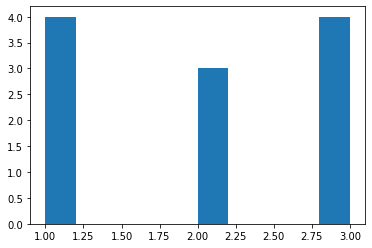

In [82]:
data_5 = mkt_table['class'].values

# histogram plot
pyplot.hist(data_5)
pyplot.show()

In [83]:
# start time to measure the time of the program execution
start_time = time.time()

# create a dictiornary - key with tail_num and value with class
# restructure the tableto prepare for a dictionary
mkt_df = mkt_table.drop(['flights'], axis=1)
mkt_df

# create an empty dictionary
dict5 = {}

for num in range(len(mkt_df)):
    dict5[mkt_df.iloc[num, 0]] = mkt_df.iloc[num, 1]

# check dictionary created from above
dict5

# map the ordinal features, using the dictionary above
work_df_no_dummy = work_df_no_dummy.replace({"mkt_unique_carrier" : dict5})

# check
work_df_no_dummy.info()
work_df_no_dummy.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,mkt_unique_carrier,class
0,AA,3
1,AS,2
2,B6,2
3,DL,3
4,F9,1
5,G4,1
6,HA,1
7,NK,2
8,UA,3
9,VX,1


{'AA': 3,
 'AS': 2,
 'B6': 2,
 'DL': 3,
 'F9': 1,
 'G4': 1,
 'HA': 1,
 'NK': 2,
 'UA': 3,
 'VX': 1,
 'WN': 3}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                520681 non-null  int64  
 1   month               520681 non-null  int64  
 2   day_of_week         520681 non-null  int64  
 3   mkt_unique_carrier  520681 non-null  int64  
 4   mkt_carrier_fl_num  520681 non-null  int64  
 5   op_unique_carrier   520681 non-null  object 
 6   tail_num            520681 non-null  object 
 7   op_carrier_fl_num   520681 non-null  int64  
 8   origin              520681 non-null  object 
 9   origin_city         520681 non-null  object 
 10  dest                520681 non-null  object 
 11  dest_city           520681 non-null  object 
 12  crs_elapsed_time    520681 non-null  float64
 13  flights             520681 non-null  float64
 14  distance            520681 non-null  float64
 15  target_class        520681 non-nul

,year,month,day_of_week,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin,origin_city,dest,dest_city,crs_elapsed_time,flights,distance,target_class
0,2019,5,2,3,4593,YX,N436YX,4593,OKC,Oklahoma City,DCA,Washington,169.0,1.0,1158.0,1
1,2019,5,2,3,4648,YX,N110HQ,4648,EYW,Key West,CLT,Charlotte,144.0,1.0,736.0,1
2,2019,5,2,3,32,DL,N319US,32,DFW,Dallas/Fort Worth,ATL,Atlanta,134.0,1.0,731.0,1




--- 0.6363241672515869 seconds ---


In [84]:
work_df_no_dummy['mkt_unique_carrier'].unique()

array([3, 1, 2])

#### __op_unique_carrier__

In [85]:
# start time to measure the time of the program execution
start_time = time.time()

# create summary table of tail_num vs flights
op_table = pd.pivot_table(work_df_no_dummy, values='flights', index=['op_unique_carrier'],
                                aggfunc=np.sum)

# reindex the rows to restore the variable in index to column
op_table = op_table.reset_index(drop=False)
op_table

# get min & Max values from the table
min_6 = min(op_table['flights'])
max_6 = max(op_table['flights'])
#bin_size4 = int((max_tailnum4 - min_tailnum4) / 5 + 1)

print(f"Max Value: {max_6} | Min Value: {min_6}")

# allocate bin_size to 4 groups
group16 = 5600
group26 = 10600
group36 = 21000
group46 = 89000

print(f"group 1: {group16} | group 2: {group26} | group 3: {group36} | group 4: {group46}")

# assign the group number to tail_num values
op_class = []

for value in op_table['flights']:
    if value <= group16:
        op_class.append(1)
    elif value > group16 and value <= group26:
        op_class.append(2)
    elif value > group26 and value <= group36:
        op_class.append(3)
    elif value > group36 and value <= group46:
        op_class.append(4)
        
# assign the list above to a new class variable
op_table['class'] = op_class

# check 
op_table
op_table['class'].unique()

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,op_unique_carrier,flights
0,9E,15780.0
1,9K,40.0
2,AA,61795.0
3,AS,16972.0
4,AX,5333.0
5,B6,20052.0
6,C5,3638.0
7,CP,6229.0
8,DL,62129.0
9,EM,564.0


Max Value: 88946.0 | Min Value: 40.0
group 1: 5600 | group 2: 10600 | group 3: 21000 | group 4: 89000


,op_unique_carrier,flights,class
0,9E,15780.0,3
1,9K,40.0,1
2,AA,61795.0,4
3,AS,16972.0,3
4,AX,5333.0,1
5,B6,20052.0,3
6,C5,3638.0,1
7,CP,6229.0,2
8,DL,62129.0,4
9,EM,564.0,1


array([3, 1, 4, 2])



--- 0.35269999504089355 seconds ---


(array([8., 0., 0., 7., 0., 0., 8., 0., 0., 5.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

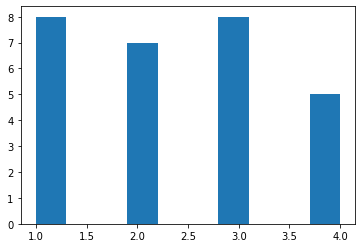

In [86]:
data_6 = op_table['class'].values

# histogram plot
pyplot.hist(data_6)
pyplot.show()

In [87]:
# start time to measure the time of the program execution
start_time = time.time()

# create a dictiornary - key with tail_num and value with class
# restructure the tableto prepare for a dictionary
op_df = op_table.drop(['flights'], axis=1)
op_df

# create an empty dictionary
dict6 = {}

for num in range(len(op_df)):
    dict6[op_df.iloc[num, 0]] = op_df.iloc[num, 1]

# check dictionary created from above
dict6

# map the ordinal features, using the dictionary above
work_df_no_dummy = work_df_no_dummy.replace({"op_unique_carrier" : dict6})

# check
work_df_no_dummy.info()
work_df_no_dummy.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,op_unique_carrier,class
0,9E,3
1,9K,1
2,AA,4
3,AS,3
4,AX,1
5,B6,3
6,C5,1
7,CP,2
8,DL,4
9,EM,1


{'9E': 3,
 '9K': 1,
 'AA': 4,
 'AS': 3,
 'AX': 1,
 'B6': 3,
 'C5': 1,
 'CP': 2,
 'DL': 4,
 'EM': 1,
 'EV': 2,
 'F9': 2,
 'G4': 2,
 'G7': 1,
 'HA': 1,
 'KS': 1,
 'MQ': 3,
 'NK': 3,
 'OH': 3,
 'OO': 4,
 'PT': 2,
 'QX': 2,
 'UA': 4,
 'VX': 1,
 'WN': 4,
 'YV': 3,
 'YX': 3,
 'ZW': 2}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                520681 non-null  int64  
 1   month               520681 non-null  int64  
 2   day_of_week         520681 non-null  int64  
 3   mkt_unique_carrier  520681 non-null  int64  
 4   mkt_carrier_fl_num  520681 non-null  int64  
 5   op_unique_carrier   520681 non-null  int64  
 6   tail_num            520681 non-null  object 
 7   op_carrier_fl_num   520681 non-null  int64  
 8   origin              520681 non-null  object 
 9   origin_city         520681 non-null  object 
 10  dest                520681 non-null  object 
 11  dest_city           520681 non-null  object 
 12  crs_elapsed_time    520681 non-null  float64
 13  flights             520681 non-null  float64
 14  distance            520681 non-null  float64
 15  target_class        520681 non-nul

,year,month,day_of_week,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin,origin_city,dest,dest_city,crs_elapsed_time,flights,distance,target_class
0,2019,5,2,3,4593,3,N436YX,4593,OKC,Oklahoma City,DCA,Washington,169.0,1.0,1158.0,1
1,2019,5,2,3,4648,3,N110HQ,4648,EYW,Key West,CLT,Charlotte,144.0,1.0,736.0,1
2,2019,5,2,3,32,4,N319US,32,DFW,Dallas/Fort Worth,ATL,Atlanta,134.0,1.0,731.0,1




--- 0.9401543140411377 seconds ---


In [88]:
work_df_no_dummy['op_unique_carrier'].unique()

array([3, 4, 2, 1])

In [89]:
# start time to measure the time of the program execution
start_time = time.time()

# convert variables to feature engineered variables
work_df_no_dummy['tail_num'] = work_df2['tail_num']
work_df_no_dummy['origin'] = work_df2['origin']
work_df_no_dummy['origin_city'] = work_df2['origin_city']
work_df_no_dummy['dest'] = work_df2['dest']
work_df_no_dummy['dest_city'] = work_df2['dest_city']

# check
work_df_no_dummy.info()
work_df_no_dummy.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                520681 non-null  int64  
 1   month               520681 non-null  int64  
 2   day_of_week         520681 non-null  int64  
 3   mkt_unique_carrier  520681 non-null  int64  
 4   mkt_carrier_fl_num  520681 non-null  int64  
 5   op_unique_carrier   520681 non-null  int64  
 6   tail_num            520681 non-null  int64  
 7   op_carrier_fl_num   520681 non-null  int64  
 8   origin              520681 non-null  int64  
 9   origin_city         520681 non-null  int64  
 10  dest                520681 non-null  int64  
 11  dest_city           520681 non-null  int64  
 12  crs_elapsed_time    520681 non-null  float64
 13  flights             520681 non-null  float64
 14  distance            520681 non-null  float64
 15  target_class        520681 non-nul

,year,month,day_of_week,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin,origin_city,dest,dest_city,crs_elapsed_time,flights,distance,target_class
0,2019,5,2,3,4593,3,3,4593,2,2,4,5,169.0,1.0,1158.0,1
1,2019,5,2,3,4648,3,3,4648,1,1,5,5,144.0,1.0,736.0,1
2,2019,5,2,3,32,4,2,32,5,5,5,5,134.0,1.0,731.0,1




--- 0.10311079025268555 seconds ---


#### __Check Correlation with target variable, 'arr_delay'__

In [90]:
train = work_df2.iloc[:, :13]
train['target'] = train_data['arr_delay']
train.info()
train.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                520681 non-null  int64  
 1   month               520681 non-null  int64  
 2   day_of_week         520681 non-null  int64  
 3   mkt_carrier_fl_num  520681 non-null  int64  
 4   tail_num            520681 non-null  int64  
 5   op_carrier_fl_num   520681 non-null  int64  
 6   origin              520681 non-null  int64  
 7   origin_city         520681 non-null  int64  
 8   dest                520681 non-null  int64  
 9   dest_city           520681 non-null  int64  
 10  crs_elapsed_time    520681 non-null  float64
 11  flights             520681 non-null  float64
 12  distance            520681 non-null  float64
 13  target              520681 non-null  float64
dtypes: float64(4), int64(10)
memory usage: 55.6 MB


,year,month,day_of_week,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin,origin_city,dest,dest_city,crs_elapsed_time,flights,distance,target
0,2019,5,2,4593,3,4593,2,2,4,5,169.0,1.0,1158.0,99.0
1,2019,5,2,4648,3,4648,1,1,5,5,144.0,1.0,736.0,4.0
2,2019,5,2,32,2,32,5,5,5,5,134.0,1.0,731.0,15.0


,year,month,day_of_week,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin,origin_city,dest,dest_city,crs_elapsed_time,flights,distance,target
year,1.000000,-0.001614,0.000856,-0.013680,-0.010194,-0.013685,-0.004197,-0.004168,-0.006266,-0.006897,0.009424,NaN,0.004035,0.018390
month,-0.001614,1.000000,0.009526,0.010979,-0.008217,0.010978,-0.002688,-0.001477,-0.001670,-0.001096,-0.006433,NaN,0.000821,-0.010558
day_of_week,0.000856,0.009526,1.000000,0.056734,-0.002463,0.056695,-0.004890,-0.004804,-0.004975,-0.007118,0.008378,NaN,0.010132,-0.006804
mkt_carrier_fl_num,-0.013680,0.010979,0.056734,1.000000,0.306086,0.999900,-0.134585,-0.112487,-0.149760,-0.118625,-0.332921,NaN,-0.364070,0.029547
tail_num,-0.010194,-0.008217,-0.002463,0.306086,1.000000,0.306094,-0.172046,-0.149155,-0.168516,-0.159328,-0.411543,NaN,-0.403964,-0.014238
op_carrier_fl_num,-0.013685,0.010978,0.056695,0.999900,0.306094,1.000000,-0.134588,-0.112502,-0.149748,-0.118625,-0.332903,NaN,-0.364044,0.029534
origin,-0.004197,-0.002688,-0.004890,-0.134585,-0.172046,-0.134588,1.000000,0.935810,-0.342457,-0.346261,0.182412,NaN,0.186025,0.000398
origin_city,-0.004168,-0.001477,-0.004804,-0.112487,-0.149155,-0.112502,0.935810,1.000000,-0.350568,-0.355032,0.167824,NaN,0.165133,0.002737
dest,-0.006266,-0.001670,-0.004975,-0.149760,-0.168516,-0.149748,-0.342457,-0.350568,1.000000,0.931614,0.228456,NaN,0.187197,0.007522
dest_city,-0.006897,-0.001096,-0.007118,-0.118625,-0.159328,-0.118625,-0.346261,-0.355032,0.931614,1.000000,0.210836,NaN,0.173090,0.010008


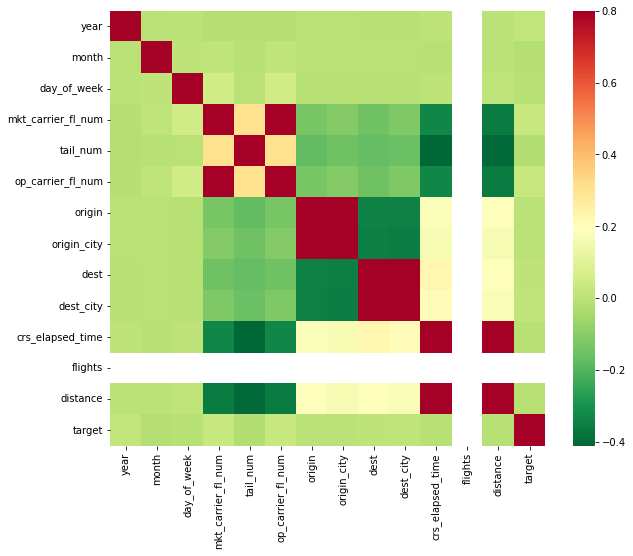

In [91]:
#correlation matrix
corrmat = train.corr()
corrmat
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

<Figure size 720x720 with 0 Axes>

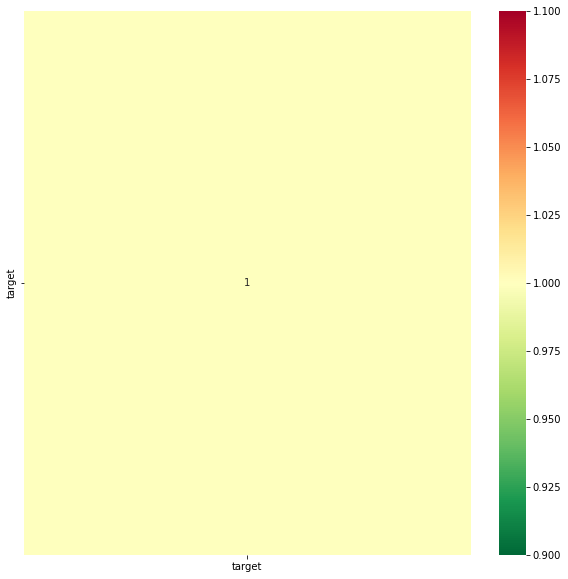

In [92]:
# most correlated features with SalePrice
top_corr_features = corrmat.index[abs(corrmat["target"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

In [93]:
# import work_df2
work_df2 = pd.read_csv('work_df2_featur_eng.csv')
work_df2.info()
work_df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 53 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   520681 non-null  int64  
 1   month                  520681 non-null  int64  
 2   day_of_week            520681 non-null  int64  
 3   mkt_carrier_fl_num     520681 non-null  int64  
 4   tail_num               520681 non-null  int64  
 5   op_carrier_fl_num      520681 non-null  int64  
 6   origin                 520681 non-null  int64  
 7   origin_city            520681 non-null  int64  
 8   dest                   520681 non-null  int64  
 9   dest_city              520681 non-null  int64  
 10  crs_elapsed_time       520681 non-null  float64
 11  flights                520681 non-null  float64
 12  distance               520681 non-null  float64
 13  mkt_unique_carrier_AA  520681 non-null  int64  
 14  mkt_unique_carrier_AS  520681 non-nu

,year,month,day_of_week,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin,origin_city,dest,dest_city,...,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW,target_class
0,2019,5,2,4593,3,4593,2,2,4,5,...,0,0,0,0,0,0,0,1,0,1
1,2019,5,2,4648,3,4648,1,1,5,5,...,0,0,0,0,0,0,0,1,0,1
2,2019,5,2,32,2,32,5,5,5,5,...,0,0,0,0,0,0,0,0,0,1
3,2019,5,2,327,1,327,5,4,3,3,...,0,0,0,0,0,0,0,0,0,1
4,2019,5,2,517,3,517,2,2,5,5,...,0,0,0,0,0,0,0,0,0,1


#### __Scaling Data: Numerical Variables__
> - mkt_carrier_fl_num
> - op_carrier_fl_num 
> - crs_elapsed_time 
> - flights
> - distance

In [94]:
# make a copy of the feature engineered data above
work_df3 = work_df2.copy()

In [95]:
# get the numerical features & review their stats
feature_names_num = ['mkt_carrier_fl_num', 'op_carrier_fl_num', 
                      'crs_elapsed_time', 'distance']

var_scale = work_df3[feature_names_num]
var_scale.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,crs_elapsed_time,distance
count,520681.000000,520681.000000,520681.00000,520681.000000
mean,2721.683132,2721.619283,138.44113,773.167354
std,1858.184281,1858.222408,71.74293,587.455075
min,1.000000,1.000000,-112.00000,16.000000
25%,1117.000000,1117.000000,87.00000,343.000000
50%,2303.000000,2303.000000,120.00000,606.000000
75%,4298.000000,4298.000000,168.00000,1009.000000
max,9400.000000,9400.000000,705.00000,5095.000000


In [96]:
# standard scale the numerical variables & make them into pd.dataframe
scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(var_scale), columns = feature_names_num)
df_scale

,mkt_carrier_fl_num,op_carrier_fl_num,crs_elapsed_time,distance
0,1.007068,1.007082,0.425950,0.655085
1,1.036667,1.036680,0.077483,-0.063268
2,-1.447481,-1.447417,-0.061903,-0.071780
3,-1.288723,-1.288663,2.196161,2.193928
4,-1.186473,-1.186414,-0.744898,-0.795240
...,...,...,...,...
520676,-1.242980,-1.242920,-0.535818,-0.379889
520677,0.750904,0.750923,-0.521880,-0.665868
520678,0.757362,0.757381,-1.302445,-1.190164
520679,0.800953,0.800971,-0.744898,-0.589267


In [97]:
# start time to measure the time of the program execution
start_time = time.time()

# replace the numerical variables with the scaled variables
work_df3 = work_df3.drop(feature_names_num, axis=1)

# combine dummy variables with work_df
work_df3 = pd.concat([work_df3, df_scale], axis=1)

# rearrange the columns in work_df3
work_df3 = work_df3[work_df2.columns.tolist()]
work_df3.info()
work_df3.head()

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 53 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   520681 non-null  int64  
 1   month                  520681 non-null  int64  
 2   day_of_week            520681 non-null  int64  
 3   mkt_carrier_fl_num     520681 non-null  float64
 4   tail_num               520681 non-null  int64  
 5   op_carrier_fl_num      520681 non-null  float64
 6   origin                 520681 non-null  int64  
 7   origin_city            520681 non-null  int64  
 8   dest                   520681 non-null  int64  
 9   dest_city              520681 non-null  int64  
 10  crs_elapsed_time       520681 non-null  float64
 11  flights                520681 non-null  float64
 12  distance               520681 non-null  float64
 13  mkt_unique_carrier_AA  520681 non-null  int64  
 14  mkt_unique_carrier_AS  520681 non-nu

,year,month,day_of_week,mkt_carrier_fl_num,tail_num,op_carrier_fl_num,origin,origin_city,dest,dest_city,...,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW,target_class
0,2019,5,2,1.007068,3,1.007082,2,2,4,5,...,0,0,0,0,0,0,0,1,0,1
1,2019,5,2,1.036667,3,1.036680,1,1,5,5,...,0,0,0,0,0,0,0,1,0,1
2,2019,5,2,-1.447481,2,-1.447417,5,5,5,5,...,0,0,0,0,0,0,0,0,0,1
3,2019,5,2,-1.288723,1,-1.288663,5,4,3,3,...,0,0,0,0,0,0,0,0,0,1
4,2019,5,2,-1.186473,3,-1.186414,2,2,5,5,...,0,0,0,0,0,0,0,0,0,1




--- 0.6587777137756348 seconds ---


In [98]:
# start time to measure the time of the program execution
start_time = time.time()

# make a copy of dataframe
scaled_no_dummy = work_df_no_dummy.copy()

# get the numerical features & review their stats
#feature_names_num = ['mkt_carrier_fl_num', 'op_carrier_fl_num', 
#                      'crs_elapsed_time', 'distance']

# convert variables to feature engineered variables
scaled_no_dummy['mkt_carrier_fl_num'] = work_df3['mkt_carrier_fl_num']
scaled_no_dummy['crs_elapsed_time'] = work_df3['crs_elapsed_time']
scaled_no_dummy['distance'] = work_df3['distance']

# drop 'op_carrier_fl_num'variable
scaled_no_dummy = scaled_no_dummy.drop(['op_carrier_fl_num'], axis=1)

# check
scaled_no_dummy.info()
scaled_no_dummy.head(3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                520681 non-null  int64  
 1   month               520681 non-null  int64  
 2   day_of_week         520681 non-null  int64  
 3   mkt_unique_carrier  520681 non-null  int64  
 4   mkt_carrier_fl_num  520681 non-null  float64
 5   op_unique_carrier   520681 non-null  int64  
 6   tail_num            520681 non-null  int64  
 7   origin              520681 non-null  int64  
 8   origin_city         520681 non-null  int64  
 9   dest                520681 non-null  int64  
 10  dest_city           520681 non-null  int64  
 11  crs_elapsed_time    520681 non-null  float64
 12  flights             520681 non-null  float64
 13  distance            520681 non-null  float64
 14  target_class        520681 non-null  int64  
dtypes: float64(4), int64(11)
memory us

,year,month,day_of_week,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin,origin_city,dest,dest_city,crs_elapsed_time,flights,distance,target_class
0,2019,5,2,3,1.007068,3,3,2,2,4,5,0.425950,1.0,0.655085,1
1,2019,5,2,3,1.036667,3,3,1,1,5,5,0.077483,1.0,-0.063268,1
2,2019,5,2,3,-1.447481,4,2,5,5,5,5,-0.061903,1.0,-0.071780,1




--- 0.22061419486999512 seconds ---


In [99]:
# export the latest work_df2 to csv
work_df_no_dummy.to_csv('no_dummy_featur_eng.csv', index=False)
scaled_no_dummy.to_csv('scaled_no_dummy_featur_eng.csv', index=False)

#### __Feature Selection - 2nd Step__
> - Use sklearn.RFE
     - https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
     - https://machinelearningmastery.com/rfe-feature-selection-in-python/
     - https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
     - https://www.datacamp.com/community/tutorials/xgboost-in-python

#### __A. RFE Run with non-scaled data__
> - work_df2

In [100]:
work_df2 = work_df2.drop(['op_carrier_fl_num'], axis=1)

work_df2.info()
work_df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 52 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   520681 non-null  int64  
 1   month                  520681 non-null  int64  
 2   day_of_week            520681 non-null  int64  
 3   mkt_carrier_fl_num     520681 non-null  int64  
 4   tail_num               520681 non-null  int64  
 5   origin                 520681 non-null  int64  
 6   origin_city            520681 non-null  int64  
 7   dest                   520681 non-null  int64  
 8   dest_city              520681 non-null  int64  
 9   crs_elapsed_time       520681 non-null  float64
 10  flights                520681 non-null  float64
 11  distance               520681 non-null  float64
 12  mkt_unique_carrier_AA  520681 non-null  int64  
 13  mkt_unique_carrier_AS  520681 non-null  int64  
 14  mkt_unique_carrier_B6  520681 non-nu

,year,month,day_of_week,mkt_carrier_fl_num,tail_num,origin,origin_city,dest,dest_city,crs_elapsed_time,...,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW,target_class
0,2019,5,2,4593,3,2,2,4,5,169.0,...,0,0,0,0,0,0,0,1,0,1
1,2019,5,2,4648,3,1,1,5,5,144.0,...,0,0,0,0,0,0,0,1,0,1
2,2019,5,2,32,2,5,5,5,5,134.0,...,0,0,0,0,0,0,0,0,0,1
3,2019,5,2,327,1,5,4,3,3,296.0,...,0,0,0,0,0,0,0,0,0,1
4,2019,5,2,517,3,2,2,5,5,85.0,...,0,0,0,0,0,0,0,0,0,1


In [101]:
# export the latest work_df2 to csv
work_df2.to_csv('work_df2_featur_engv2.csv', index=False)

##### __Estimator: Decision Tree__

In [102]:
# start time to measure the time of the program execution
start_time = time.time()

# Feature Selections through RFE
# from sklearn.feature_selection import RFE

# define X & y
X = work_df2.iloc[:, :51].values
y = work_df2.iloc[:, 51].values

# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=30)

# fit RFE
rfe.fit(X, y)

# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=30)

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 21.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected False, Rank: 9.000
Column: 18, Selected False, Rank: 16.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected False, Rank: 20.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected False, Rank: 5.000
Column: 24, Selected False, Rank: 22.000
Column: 25, Selected True

##### __Estimator: Logistic Regression__

In [ ]:
# start time to measure the time of the program execution
start_time = time.time()

# Feature Selections through RFE
# from sklearn.feature_selection import RFE

# define RFE
rfe2 = RFE(estimator=LogisticRegression(), n_features_to_select=30)

# fit RFE
rfe2.fit(X, y)

# summarize all features
for i in range(X.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe2.support_[i], rfe2.ranking_[i]))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

RFE(estimator=LogisticRegression(), n_features_to_select=30)

Column: 0, Selected False, Rank: 17.000
Column: 1, Selected False, Rank: 12.000
Column: 2, Selected False, Rank: 10.000
Column: 3, Selected False, Rank: 20.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected False, Rank: 4.000
Column: 7, Selected False, Rank: 2.000
Column: 8, Selected False, Rank: 9.000
Column: 9, Selected False, Rank: 13.000
Column: 10, Selected False, Rank: 22.000
Column: 11, Selected False, Rank: 14.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected False, Rank: 16.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected False, Rank: 5.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected False, Rank: 19.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected False, Rank: 18.000
Column: 25,

#### __B. RFE Run with scaled data__
> - work_df3

In [103]:
work_df3 = work_df3.drop(['op_carrier_fl_num'], axis=1)

work_df3.info()
work_df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 52 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   520681 non-null  int64  
 1   month                  520681 non-null  int64  
 2   day_of_week            520681 non-null  int64  
 3   mkt_carrier_fl_num     520681 non-null  float64
 4   tail_num               520681 non-null  int64  
 5   origin                 520681 non-null  int64  
 6   origin_city            520681 non-null  int64  
 7   dest                   520681 non-null  int64  
 8   dest_city              520681 non-null  int64  
 9   crs_elapsed_time       520681 non-null  float64
 10  flights                520681 non-null  float64
 11  distance               520681 non-null  float64
 12  mkt_unique_carrier_AA  520681 non-null  int64  
 13  mkt_unique_carrier_AS  520681 non-null  int64  
 14  mkt_unique_carrier_B6  520681 non-nu

,year,month,day_of_week,mkt_carrier_fl_num,tail_num,origin,origin_city,dest,dest_city,crs_elapsed_time,...,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW,target_class
0,2019,5,2,1.007068,3,2,2,4,5,0.425950,...,0,0,0,0,0,0,0,1,0,1
1,2019,5,2,1.036667,3,1,1,5,5,0.077483,...,0,0,0,0,0,0,0,1,0,1
2,2019,5,2,-1.447481,2,5,5,5,5,-0.061903,...,0,0,0,0,0,0,0,0,0,1
3,2019,5,2,-1.288723,1,5,4,3,3,2.196161,...,0,0,0,0,0,0,0,0,0,1
4,2019,5,2,-1.186473,3,2,2,5,5,-0.744898,...,0,0,0,0,0,0,0,0,0,1


In [105]:
# Export work_df3 ro csv file
work_df3.to_csv('work_df3_scaledfeatur_eng.csv', index=False)


In [2]:

work_df3 = pd.read_csv('work_df3_scaledfeatur_eng.csv')
work_df3.info()
work_df3.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 52 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   520681 non-null  int64  
 1   month                  520681 non-null  int64  
 2   day_of_week            520681 non-null  int64  
 3   mkt_carrier_fl_num     520681 non-null  float64
 4   tail_num               520681 non-null  int64  
 5   origin                 520681 non-null  int64  
 6   origin_city            520681 non-null  int64  
 7   dest                   520681 non-null  int64  
 8   dest_city              520681 non-null  int64  
 9   crs_elapsed_time       520681 non-null  float64
 10  flights                520681 non-null  float64
 11  distance               520681 non-null  float64
 12  mkt_unique_carrier_AA  520681 non-null  int64  
 13  mkt_unique_carrier_AS  520681 non-null  int64  
 14  mkt_unique_carrier_B6  520681 non-nu

,year,month,day_of_week,mkt_carrier_fl_num,tail_num,origin,origin_city,dest,dest_city,crs_elapsed_time,...,op_unique_carrier_OO,op_unique_carrier_PT,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YV,op_unique_carrier_YX,op_unique_carrier_ZW,target_class
0,2019,5,2,1.007068,3,2,2,4,5,0.425950,...,0,0,0,0,0,0,0,1,0,1
1,2019,5,2,1.036667,3,1,1,5,5,0.077483,...,0,0,0,0,0,0,0,1,0,1
2,2019,5,2,-1.447481,2,5,5,5,5,-0.061903,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# start time to measure the time of the program execution
start_time = time.time()

# Feature Selections through RFE
# from sklearn.feature_selection import RFE

# define X & y
X1 = work_df3.iloc[:, :51].values
y1 = work_df3.iloc[:, 51].values

# define RFE
rfe3 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=30)

# fit RFE
rfe3.fit(X1, y1)

# summarize all features
for i in range(X1.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe3.support_[i], rfe3.ranking_[i]))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=30)

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 21.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected False, Rank: 14.000
Column: 18, Selected False, Rank: 16.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected False, Rank: 19.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected False, Rank: 5.000
Column: 24, Selected False, Rank: 22.000
Column: 25, Selected Tru

In [ ]:
# start time to measure the time of the program execution
start_time = time.time()

# Feature Selections through RFE
# from sklearn.feature_selection import RFE

# define RFE
rfe4 = RFE(estimator=LogisticRegression(), n_features_to_select=30)

# fit RFE
rfe4.fit(X1, y1)

# summarize all features
for i in range(X1.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe4.support_[i], rfe4.ranking_[i]))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

RFE(estimator=LogisticRegression(), n_features_to_select=30)

Column: 0, Selected False, Rank: 19.000
Column: 1, Selected False, Rank: 17.000
Column: 2, Selected False, Rank: 16.000
Column: 3, Selected False, Rank: 10.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected False, Rank: 5.000
Column: 7, Selected False, Rank: 4.000
Column: 8, Selected False, Rank: 15.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 22.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected False, Rank: 8.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected False, Rank: 11.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected True, Rank: 1.000
Column: 18, Selected False, Rank: 3.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected False, Rank: 18.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected True, Rank: 1.000
Column: 23, Selected True, Rank: 1.000
Column: 24, Selected False, Rank: 20.000
Column: 25, S

#### __Random Forest Feature Importance__

RandomForestClassifier(random_state=0)

mkt_carrier_fl_num       0.228920
crs_elapsed_time         0.202060
distance                 0.153961
month                    0.125429
day_of_week              0.104627
tail_num                 0.036524
dest                     0.025939
dest_city                0.025735
year                     0.020199
origin                   0.019559
origin_city              0.019387
mkt_unique_carrier_DL    0.003031
op_unique_carrier_OO     0.002791
mkt_unique_carrier_AA    0.002102
mkt_unique_carrier_UA    0.002064
op_unique_carrier_YX     0.001973
op_unique_carrier_DL     0.001837
op_unique_carrier_AA     0.001472
op_unique_carrier_UA     0.001391
mkt_unique_carrier_WN    0.001356
op_unique_carrier_WN     0.001356
mkt_unique_carrier_AS    0.001326
op_unique_carrier_MQ     0.001318
op_unique_carrier_EV     0.001275
op_unique_carrier_YV     0.001142
op_unique_carrier_OH     0.001065
op_unique_carrier_AS     0.000901
op_unique_carrier_G7     0.000884
op_unique_carrier_9E     0.000873
op_unique_carr

<Figure size 1200x960 with 0 Axes>

<AxesSubplot:>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

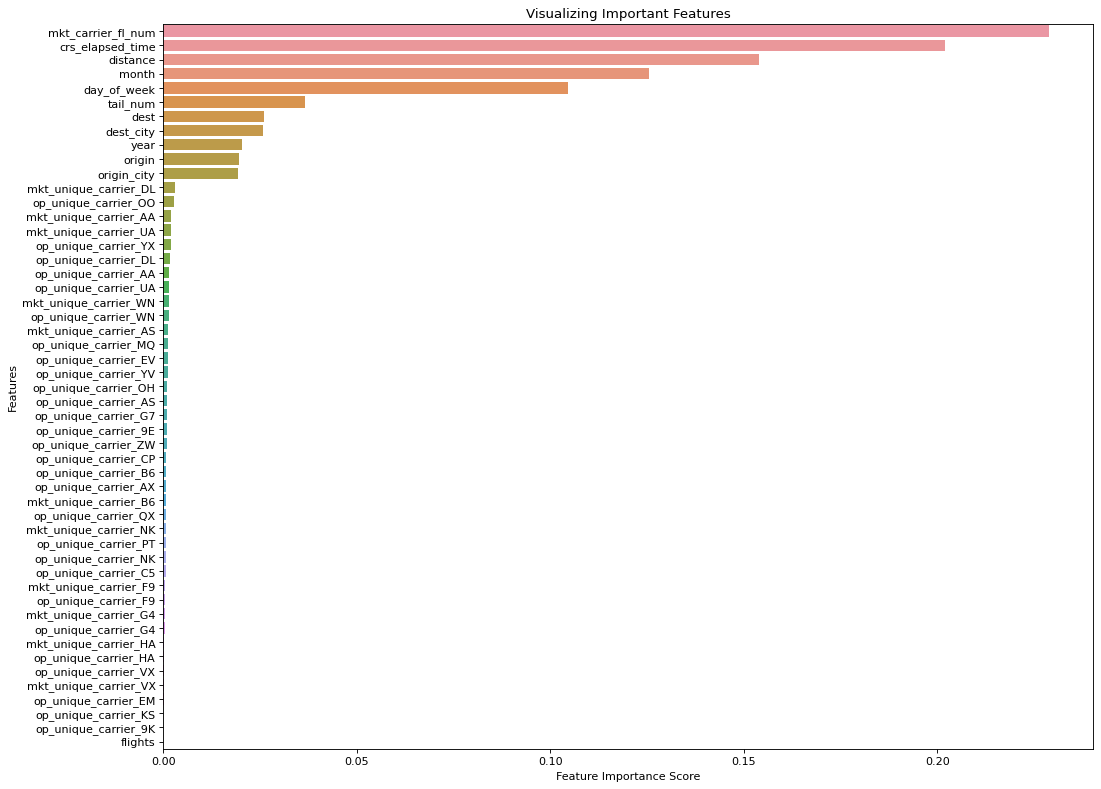



--- 87.53596067428589 seconds ---


In [ ]:
# start time to measure the time of the program execution
start_time = time.time()

# Assign X & y
X2 = work_df3.iloc[:, :51]
y2 = work_df3.iloc[:, 51]

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.20, random_state = 42)

# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, 
                           index=X_train.columns).sort_values(ascending=False)

feature_scores

# Creating a seaborn bar plot
figure(figsize=(15, 12), dpi=80)
sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

#### __Classification Model Run: Preliminary before Grid_Search & Hyperparameter Tuning__

In [4]:
# Assign X & y
X2 = work_df3.iloc[:, :51]
y2 = work_df3.iloc[:, 51]

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.20, random_state = 42)

In [5]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

RandomForestClassifier()



--- 131.44773626327515 seconds ---


In [6]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Logistic Regression Model
lg = LogisticRegression(random_state=0)
lg.fit(X_train, y_train)
y_pred_lg = lg.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

LogisticRegression(random_state=0)



--- 13.327927112579346 seconds ---


In [7]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Guasian Naive Bays Model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

GaussianNB()



--- 0.6484878063201904 seconds ---


In [8]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

DecisionTreeClassifier()



--- 8.836459636688232 seconds ---


In [9]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Stochastic Gradient Classifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

SGDClassifier()



--- 110.03159952163696 seconds ---


In [10]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

XGBClassifier()



--- 70.33800220489502 seconds ---


In [13]:
# function for performance metrics - scores
def classification_metrics(y_test, y_pred_rf, y_pred_lg, y_pred_gnb, 
                           y_pred_dt, y_pred_sgd, y_pred_xgb):
    
  rf_accuracy = accuracy_score(y_test, y_pred_rf)
  rf_f1 = f1_score(y_test, y_pred_rf, average='micro')
  rf_precision = precision_score(y_test, y_pred_rf, average='micro')
  rf_recall = recall_score(y_test, y_pred_rf, average='micro')

  lg_accuracy = accuracy_score(y_test, y_pred_lg)
  lg_f1 = f1_score(y_test, y_pred_lg, average='micro')
  lg_precision = precision_score(y_test, y_pred_lg, average='micro')
  lg_recall = recall_score(y_test, y_pred_lg, average='micro')

  gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
  gnb_f1 = f1_score(y_test, y_pred_gnb, average='micro')
  gnb_precision = precision_score(y_test, y_pred_gnb, average='micro')
  gnb_recall = recall_score(y_test, y_pred_gnb, average='micro')

  dt_accuracy = accuracy_score(y_test, y_pred_dt)
  dt_f1 = f1_score(y_test, y_pred_dt, average='micro')
  dt_precision = precision_score(y_test, y_pred_dt, average='micro')
  dt_recall = recall_score(y_test, y_pred_dt, average='micro')

  sgd_accuracy = accuracy_score(y_test, y_pred_sgd)
  sgd_f1 = f1_score(y_test, y_pred_sgd, average='micro')
  sgd_precision = precision_score(y_test, y_pred_sgd, average='micro')
  sgd_recall = recall_score(y_test, y_pred_sgd, average='micro')

  xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
  xgb_f1 = f1_score(y_test, y_pred_xgb, average='micro')
  xgb_precision = precision_score(y_test, y_pred_xgb, average='micro')
  xgb_recall = recall_score(y_test, y_pred_xgb, average='micro')

  df_cl_metrics = pd.DataFrame({'RF': [rf_accuracy, rf_f1, rf_precision, rf_recall],
                                'LogisticR': [lg_accuracy, lg_f1, lg_precision, lg_recall],
                                'GNB': [gnb_accuracy, gnb_f1, gnb_precision, gnb_recall],
                                'DecisionT': [dt_accuracy, dt_f1, dt_precision, dt_recall],
                                'SGD': [sgd_accuracy, sgd_f1, sgd_precision, sgd_recall],
                                'XGB': [xgb_accuracy, xgb_f1, xgb_precision, xgb_recall]
                                }, index=['accuracy', 'f1_score', 'precision', 'recall'])

  return df_cl_metrics

In [14]:
# start time to measure the time of the program execution
start_time = time.time()

classification_metrics(y_test, y_pred_rf, y_pred_lg, y_pred_gnb, 
                           y_pred_dt, y_pred_sgd, y_pred_xgb)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,RF,LogisticR,GNB,DecisionT,SGD,XGB
accuracy,0.558197,0.536159,0.525279,0.531483,0.518778,0.558985
f1_score,0.558197,0.536159,0.525279,0.531483,0.518778,0.558985
precision,0.558197,0.536159,0.525279,0.531483,0.518778,0.558985
recall,0.558197,0.536159,0.525279,0.531483,0.518778,0.558985




--- 1.548966646194458 seconds ---


#### __Classification Model Run: after feature selection from RFE / Randon Forest Feature Importance__

In [3]:
remove_lower_features = ['flights', 'mkt_unique_carrier_HA', 'op_unique_carrier_9K',
                         'op_unique_carrier_G4','op_unique_carrier_PT','op_unique_carrier_YV']

work_df3_1 = work_df3.drop(remove_lower_features, axis=1)

# check
work_df3_1.info()
work_df3_1.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   520681 non-null  int64  
 1   month                  520681 non-null  int64  
 2   day_of_week            520681 non-null  int64  
 3   mkt_carrier_fl_num     520681 non-null  float64
 4   tail_num               520681 non-null  int64  
 5   origin                 520681 non-null  int64  
 6   origin_city            520681 non-null  int64  
 7   dest                   520681 non-null  int64  
 8   dest_city              520681 non-null  int64  
 9   crs_elapsed_time       520681 non-null  float64
 10  distance               520681 non-null  float64
 11  mkt_unique_carrier_AA  520681 non-null  int64  
 12  mkt_unique_carrier_AS  520681 non-null  int64  
 13  mkt_unique_carrier_B6  520681 non-null  int64  
 14  mkt_unique_carrier_DL  520681 non-nu

,year,month,day_of_week,mkt_carrier_fl_num,tail_num,origin,origin_city,dest,dest_city,crs_elapsed_time,...,op_unique_carrier_NK,op_unique_carrier_OH,op_unique_carrier_OO,op_unique_carrier_QX,op_unique_carrier_UA,op_unique_carrier_VX,op_unique_carrier_WN,op_unique_carrier_YX,op_unique_carrier_ZW,target_class
0,2019,5,2,1.007068,3,2,2,4,5,0.425950,...,0,0,0,0,0,0,0,1,0,1
1,2019,5,2,1.036667,3,1,1,5,5,0.077483,...,0,0,0,0,0,0,0,1,0,1
2,2019,5,2,-1.447481,2,5,5,5,5,-0.061903,...,0,0,0,0,0,0,0,0,0,1


In [4]:
# Assign X & y
X2_1 = work_df3_1.iloc[:, :45]
y2_1 = work_df3_1.iloc[:, 45]

# split data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X2_1, y2_1, test_size = 0.20, random_state = 42)

In [6]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Random Forest Model
rf3 = RandomForestClassifier()
rf3.fit(X_train3, y_train3)
y_pred_rf3 = rf3.predict(X_test3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

RandomForestClassifier()



--- 183.69111156463623 seconds ---


In [7]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Logistic Regression Model
lg3 = LogisticRegression(random_state=0)
lg3.fit(X_train3, y_train3)
y_pred_lg3 = lg3.predict(X_test3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

LogisticRegression(random_state=0)



--- 37.622002840042114 seconds ---


In [8]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Guasian Naive Bays Model
gnb3 = GaussianNB()
gnb3.fit(X_train3, y_train3)
y_pred_gnb3 = gnb3.predict(X_test3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

GaussianNB()



--- 0.8630120754241943 seconds ---


In [9]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Decision Tree
dt3 = DecisionTreeClassifier()
dt3.fit(X_train3, y_train3)
y_pred_dt3 = dt3.predict(X_test3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

DecisionTreeClassifier()



--- 12.701311588287354 seconds ---


In [10]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Stochastic Gradient Classifier
sgd3 = SGDClassifier()
sgd3.fit(X_train3, y_train3)
y_pred_sgd3 = sgd3.predict(X_test3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

SGDClassifier()



--- 91.3164701461792 seconds ---


In [11]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit XGBoost Classifier
xgb3 = XGBClassifier()
xgb3.fit(X_train3, y_train3)
y_pred_xgb3 = xgb3.predict(X_test3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

[12:59:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)



--- 78.42545056343079 seconds ---


In [14]:
# start time to measure the time of the program execution
start_time = time.time()

classification_metrics(y_test3, y_pred_rf3, y_pred_lg3, y_pred_gnb3, 
                           y_pred_dt3, y_pred_sgd3, y_pred_xgb3)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,RF,LogisticR,GNB,DecisionT,SGD,XGB
accuracy,0.560377,0.536034,0.524482,0.531886,0.521429,0.573648
f1_score,0.560377,0.536034,0.524482,0.531886,0.521429,0.573648
precision,0.560377,0.536034,0.524482,0.531886,0.521429,0.573648
recall,0.560377,0.536034,0.524482,0.531886,0.521429,0.573648




--- 1.2183010578155518 seconds ---


#### __Repeat the Feature Selection Processes above on No_Dummary version__

In [16]:
scaled_no_dummy = pd.read_csv('scaled_no_dummy_featur_eng.csv')


In [21]:
scaled_no_dummy.info()
scaled_no_dummy.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520681 entries, 0 to 520680
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                520681 non-null  int64  
 1   month               520681 non-null  int64  
 2   day_of_week         520681 non-null  int64  
 3   mkt_unique_carrier  520681 non-null  int64  
 4   mkt_carrier_fl_num  520681 non-null  float64
 5   op_unique_carrier   520681 non-null  int64  
 6   tail_num            520681 non-null  int64  
 7   origin              520681 non-null  int64  
 8   origin_city         520681 non-null  int64  
 9   dest                520681 non-null  int64  
 10  dest_city           520681 non-null  int64  
 11  crs_elapsed_time    520681 non-null  float64
 12  flights             520681 non-null  float64
 13  distance            520681 non-null  float64
 14  target_class        520681 non-null  int64  
dtypes: float64(4), int64(11)
memory us

,year,month,day_of_week,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin,origin_city,dest,dest_city,crs_elapsed_time,flights,distance,target_class
0,2019,5,2,3,1.007068,3,3,2,2,4,5,0.425950,1.0,0.655085,1
1,2019,5,2,3,1.036667,3,3,1,1,5,5,0.077483,1.0,-0.063268,1
2,2019,5,2,3,-1.447481,4,2,5,5,5,5,-0.061903,1.0,-0.071780,1


In [5]:
# start time to measure the time of the program execution
start_time = time.time()

# Feature Selections through RFE
# from sklearn.feature_selection import RFE

# define X & y
X3 = scaled_no_dummy.iloc[:, :14].values
y3 = scaled_no_dummy.iloc[:, 14].values

# define RFE
rfe5 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=7)

# fit RFE
rfe5.fit(X3, y3)

# summarize all features
for i in range(X3.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe5.support_[i], rfe5.ranking_[i]))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=7)

Column: 0, Selected False, Rank: 4.000
Column: 1, Selected False, Rank: 2.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 7.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 3.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 5.000
Column: 8, Selected False, Rank: 6.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected False, Rank: 8.000
Column: 13, Selected True, Rank: 1.000


--- 48.093750953674316 seconds ---


In [6]:
# start time to measure the time of the program execution
start_time = time.time()

# Feature Selections through RFE
# from sklearn.feature_selection import RFE

# define RFE
rfe6 = RFE(estimator=LogisticRegression(), n_features_to_select=7)

# fit RFE
rfe6.fit(X3, y3)

# summarize all features
for i in range(X3.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe6.support_[i], rfe6.ranking_[i]))

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

RFE(estimator=LogisticRegression(), n_features_to_select=7)

Column: 0, Selected False, Rank: 7.000
Column: 1, Selected False, Rank: 6.000
Column: 2, Selected False, Rank: 5.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected False, Rank: 4.000
Column: 7, Selected False, Rank: 3.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 2.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected False, Rank: 8.000
Column: 13, Selected True, Rank: 1.000


--- 39.64962387084961 seconds ---


RandomForestClassifier(random_state=0)

mkt_carrier_fl_num    0.248034
crs_elapsed_time      0.209388
distance              0.177535
month                 0.101220
day_of_week           0.085099
tail_num              0.040926
dest                  0.029121
dest_city             0.028552
origin                0.019868
year                  0.019130
origin_city           0.018260
op_unique_carrier     0.016707
mkt_unique_carrier    0.006160
flights               0.000000
dtype: float64

<Figure size 1200x960 with 0 Axes>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

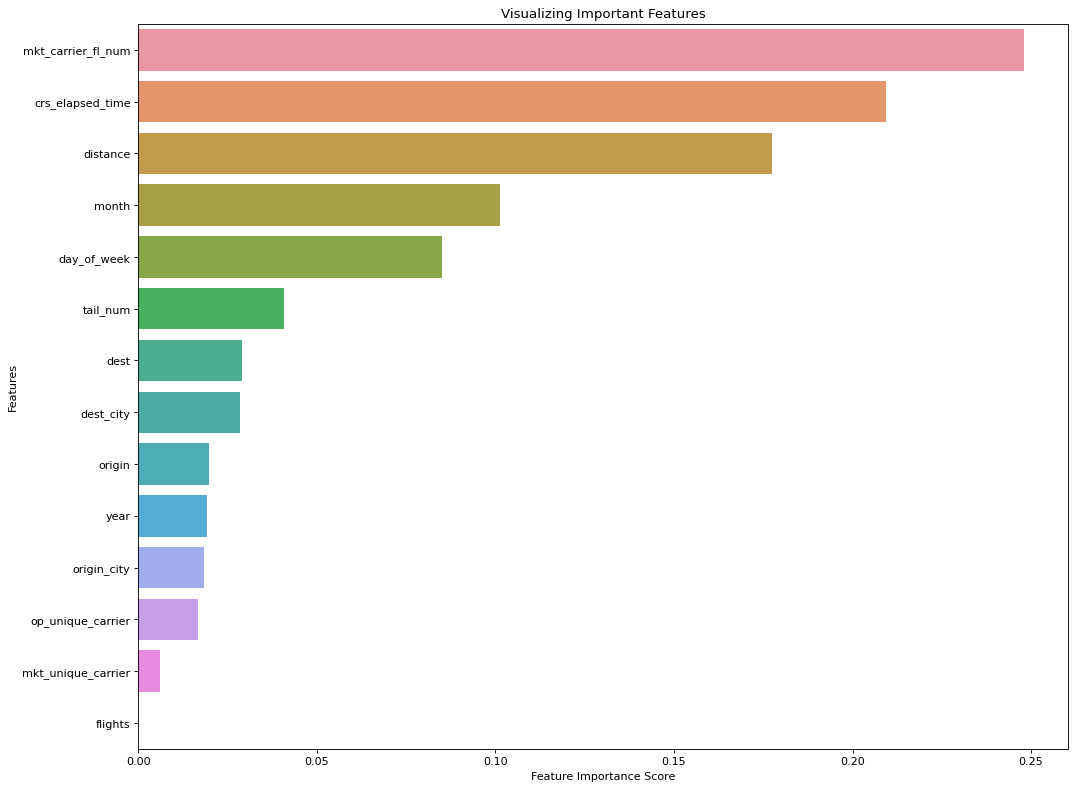



--- 122.32455778121948 seconds ---


In [18]:
# start time to measure the time of the program execution
start_time = time.time()

# Assign X & y
X4 = scaled_no_dummy.iloc[:, :14]
y4 = scaled_no_dummy.iloc[:, 14]

# split data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X4, y4, test_size = 0.20, random_state = 42)

# create the classifier with n_estimators = 100
clf1 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf1.fit(X_train1, y_train1)

# view the feature scores
feature_scores1 = pd.Series(clf1.feature_importances_, 
                           index=X_train1.columns).sort_values(ascending=False)

feature_scores1

# Creating a seaborn bar plot
figure(figsize=(15, 12), dpi=80)
sns.barplot(x=feature_scores1, y=feature_scores1.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

#### __Classification Model Run (without dummies): Preliminary before Grid_Search & Hyperparameter Tuning__

In [19]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Random Forest Model
rf2 = RandomForestClassifier()
rf2.fit(X_train1, y_train1)
y_pred_rf2 = rf2.predict(X_test1)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

RandomForestClassifier()



--- 134.13099575042725 seconds ---


In [22]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Logistic Regression Model
lg2 = LogisticRegression(random_state=0)
lg2.fit(X_train1, y_train1)
y_pred_lg2 = lg2.predict(X_test1)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

LogisticRegression(random_state=0)



--- 5.114914894104004 seconds ---


In [23]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Guasian Naive Bays Model
gnb2 = GaussianNB()
gnb2.fit(X_train1, y_train1)
y_pred_gnb2 = gnb2.predict(X_test1)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

GaussianNB()



--- 0.25831174850463867 seconds ---


In [24]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Decision Tree
dt2 = DecisionTreeClassifier()
dt2.fit(X_train1, y_train1)
y_pred_dt2 = dt2.predict(X_test1)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

DecisionTreeClassifier()



--- 5.715975046157837 seconds ---


In [25]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit Stochastic Gradient Classifier
sgd2 = SGDClassifier()
sgd2.fit(X_train1, y_train1)
y_pred_sgd2 = sgd2.predict(X_test1)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

SGDClassifier()



--- 56.37745499610901 seconds ---


In [26]:
# start time to measure the time of the program execution
start_time = time.time()

# Fit XGBoost Classifier
xgb2 = XGBClassifier()
xgb2.fit(X_train1, y_train1)
y_pred_xgb2 = xgb2.predict(X_test1)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

XGBClassifier()



--- 31.801268577575684 seconds ---


In [27]:
# start time to measure the time of the program execution
start_time = time.time()

# Check performance metrics - scores
classification_metrics(y_test1, y_pred_rf2, y_pred_lg2, y_pred_gnb2, 
                           y_pred_dt2, y_pred_sgd2, y_pred_xgb2)

# print the overall program runtime.
print(f"\n\n--- {(time.time() - start_time)} seconds ---")

,RF,LogisticR,GNB,DecisionT,SGD,XGB
accuracy,0.553972,0.525692,0.525404,0.527689,0.500331,0.554174
f1_score,0.553972,0.525692,0.525404,0.527689,0.500331,0.554174
precision,0.553972,0.525692,0.525404,0.527689,0.500331,0.554174
recall,0.553972,0.525692,0.525404,0.527689,0.500331,0.554174




--- 1.1234393119812012 seconds ---
